# 一、数据文档
## 背景描述
本数据集汇总了一家电商店铺在2023年整年的订单数据，包含3000条订单记录，适用于分析用户行为、购物趋势以及制定营销策略等
## 数据说明
| 字段 | 说明 |
| --- | --- | 
| 会员 | 该笔订单的下单用户是否为店铺会员 |
| 首次下单用户 | 该笔订单的下单用户是否为首次下单 |
|活动优惠|该笔订单是否享受了活动优惠|
|换货|1：该笔订单被换货；0：该笔订单未换货|
|退货|1：该笔订单被退货；0：该笔订单未退货|
已评价|1：用户评价了该订单；0：用户未评价该订单|


## 数据来源
本数据集是生成式模拟数据

# 二、探索性数据

In [1]:
#加载数据集
import pandas as pd 
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False
data=pd.read_csv('orders_data.csv')
data.head()

,订单交易时间,订单编号,订单来源,用户ID,会员,首次下单用户,性别,品类,商品单价,购买数量,活动优惠,换货,退货,已评价
0,2023-01-01,GNIW4174472,直播下单,YS940276,否,否,女,A,119,1,无,0,0,1
1,2023-01-01,UQNV753441,店铺下单,YY60341,否,是,女,D,59,1,无,0,1,1
2,2023-01-01,ZSES6481292,直播下单,LE367522,否,是,女,A,119,1,无,0,0,1
3,2023-01-01,PTDZ3789444,直播下单,UY543729,否,是,女,C,79,1,无,0,0,1
4,2023-01-01,AVTA3716825,店铺下单,RP810594,否,是,女,A,119,1,无,0,0,0


In [2]:
#查看数据集的大小（行数和列数）
dataset_size=data.shape
dataset_size


(3354, 14)

In [3]:
#数据类型检查
data_types=data.dtypes
data_types

订单交易时间    object
订单编号      object
订单来源      object
用户ID      object
会员        object
首次下单用户    object
性别        object
品类        object
商品单价       int64
购买数量       int64
活动优惠      object
换货         int64
退货         int64
已评价        int64
dtype: object

In [4]:
#缺失值检查
missing_values=data.isnull().sum()
missing_values

订单交易时间    0
订单编号      0
订单来源      0
用户ID      0
会员        0
首次下单用户    0
性别        0
品类        0
商品单价      0
购买数量      0
活动优惠      0
换货        0
退货        0
已评价       0
dtype: int64

In [5]:
#唯一值检查
unique_values=data.nunique()
unique_values

订单交易时间     362
订单编号      3354
订单来源         2
用户ID      2000
会员           2
首次下单用户       2
性别           2
品类           4
商品单价         4
购买数量         4
活动优惠         2
换货           2
退货           2
已评价          2
dtype: int64

In [6]:
#描述性统计
descriptive_stats=data.describe()
descriptive_stats

,商品单价,购买数量,换货,退货,已评价
count,3354.000000,3354.000000,3354.000000,3354.000000,3354.00000
mean,111.128801,1.169648,0.016995,0.067979,0.64997
std,46.055894,0.501852,0.129270,0.251747,0.47705
min,59.000000,1.000000,0.000000,0.000000,0.00000
25%,79.000000,1.000000,0.000000,0.000000,0.00000
50%,119.000000,1.000000,0.000000,0.000000,1.00000
75%,119.000000,1.000000,0.000000,0.000000,1.00000
max,199.000000,4.000000,1.000000,1.000000,1.00000


根据探索性数据分析的结果，我们可以总结以下几点：

数据集大小：共有33354行和14列

数据类型：大多数列是对象（字符串）类型，除了商品单价，购买数量、换货、退还、退货和已评价这几列是整数类型

缺失值：数据集中没有缺失值

唯一值数量：
订单编号有3354个唯一值，表明每笔订单都有唯一的编号
用户ID有2000个唯一值，意味着有些用户下了多笔订单
订单来源、会员、首次下单用户、性别、品类、活动优惠、换货、退货和已评价这些字段都有少量的唯一值，表明这些是分类变量

描述性统计：
商品单价的平均值约为111元，标准差约46元，表明价格分布有一定的波动
购买数量的平均值约为1.17，大多数订单的购买数量为1
换货、退货和已评价字段的大多数值为0，表示大部分订单没有发生换货或退货，而且大多数订单已被评价。

下面我们将根据如下六个方面对数据集进行简单的可视化分析：
1. **订单来源分布**：显示不同来源（如直播下单、店铺下单）的订单数量
2. **用户性别分布**：展示男性和女性用户的订单数量
3. **商品品类分布**：展示不同品类商品的订单数量
4. **商品单价分布**：呈现商品单价的分布情况，可以看到不同价格区间的商品数量
5. **购买数量分布**：反映了订单的购买数量分布
6. **换货、退货和评价情况**：展示了换货、退货和评价的情况，其中绿色代表已评价，橙色代表退货，蓝色代表换货


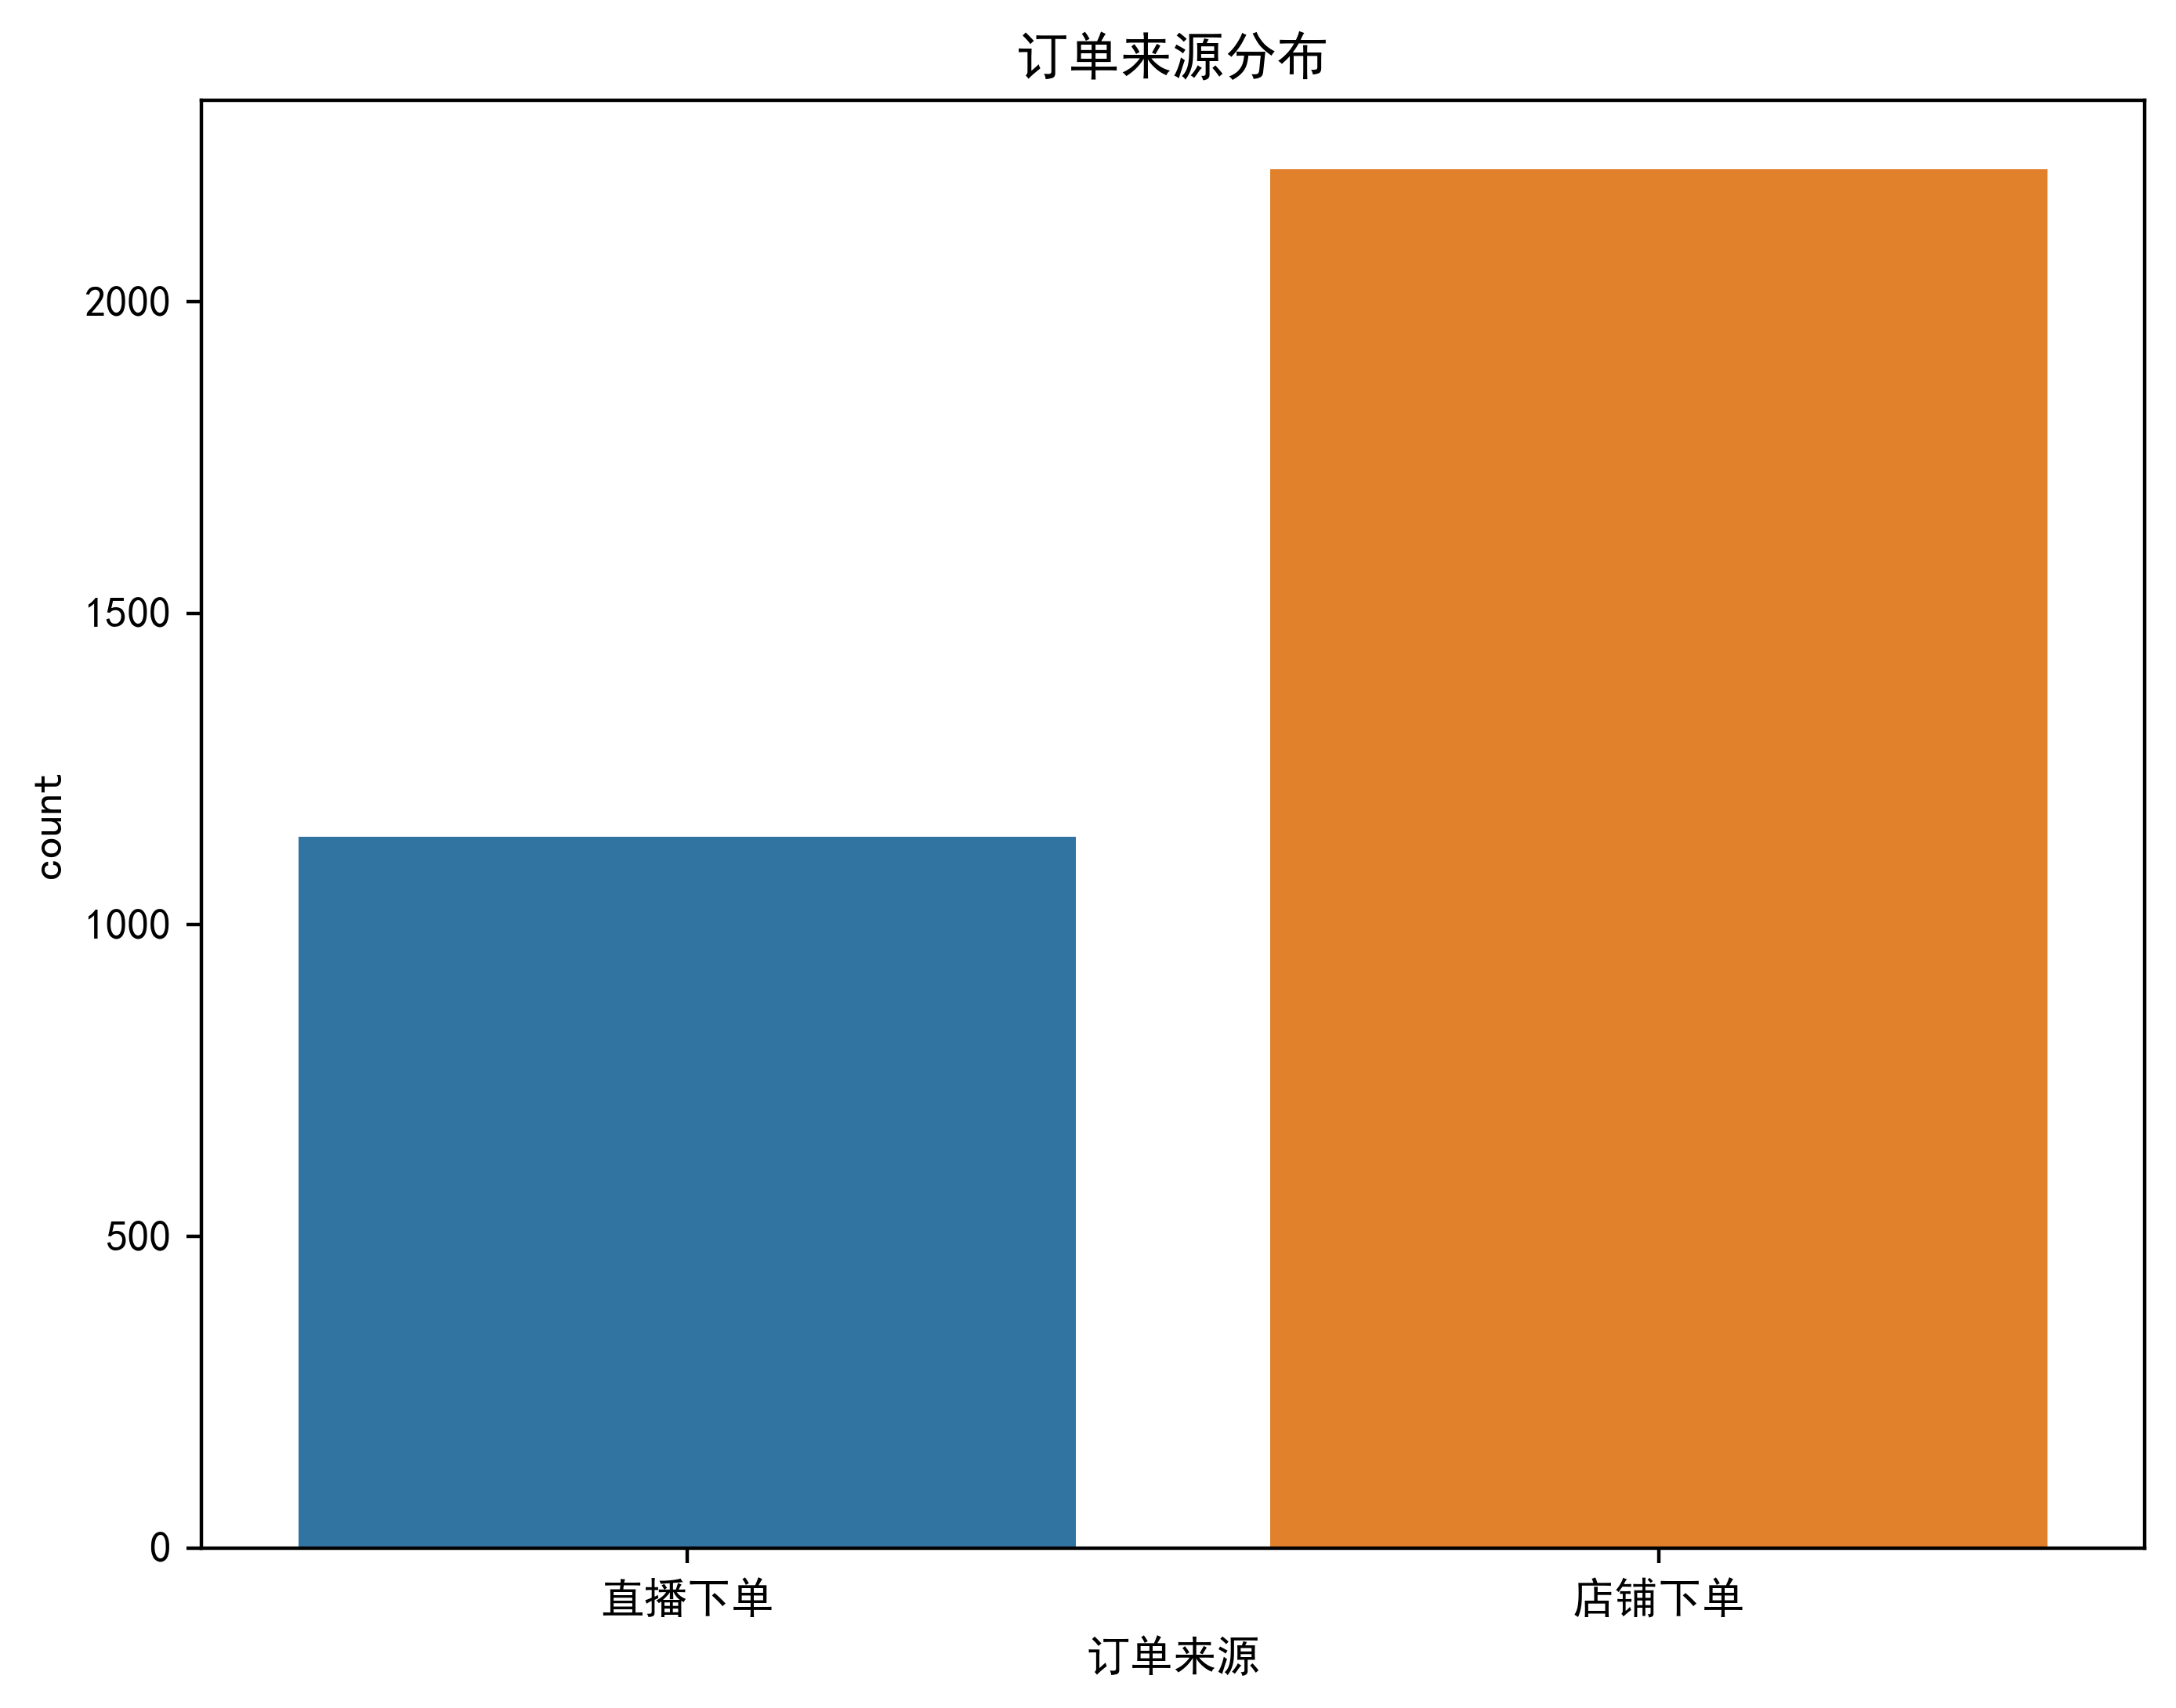

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #中文
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=400

plt.figure(figsize=(8,6))
sns.countplot(x='订单来源',data=data)
plt.title('订单来源分布')
plt.show()

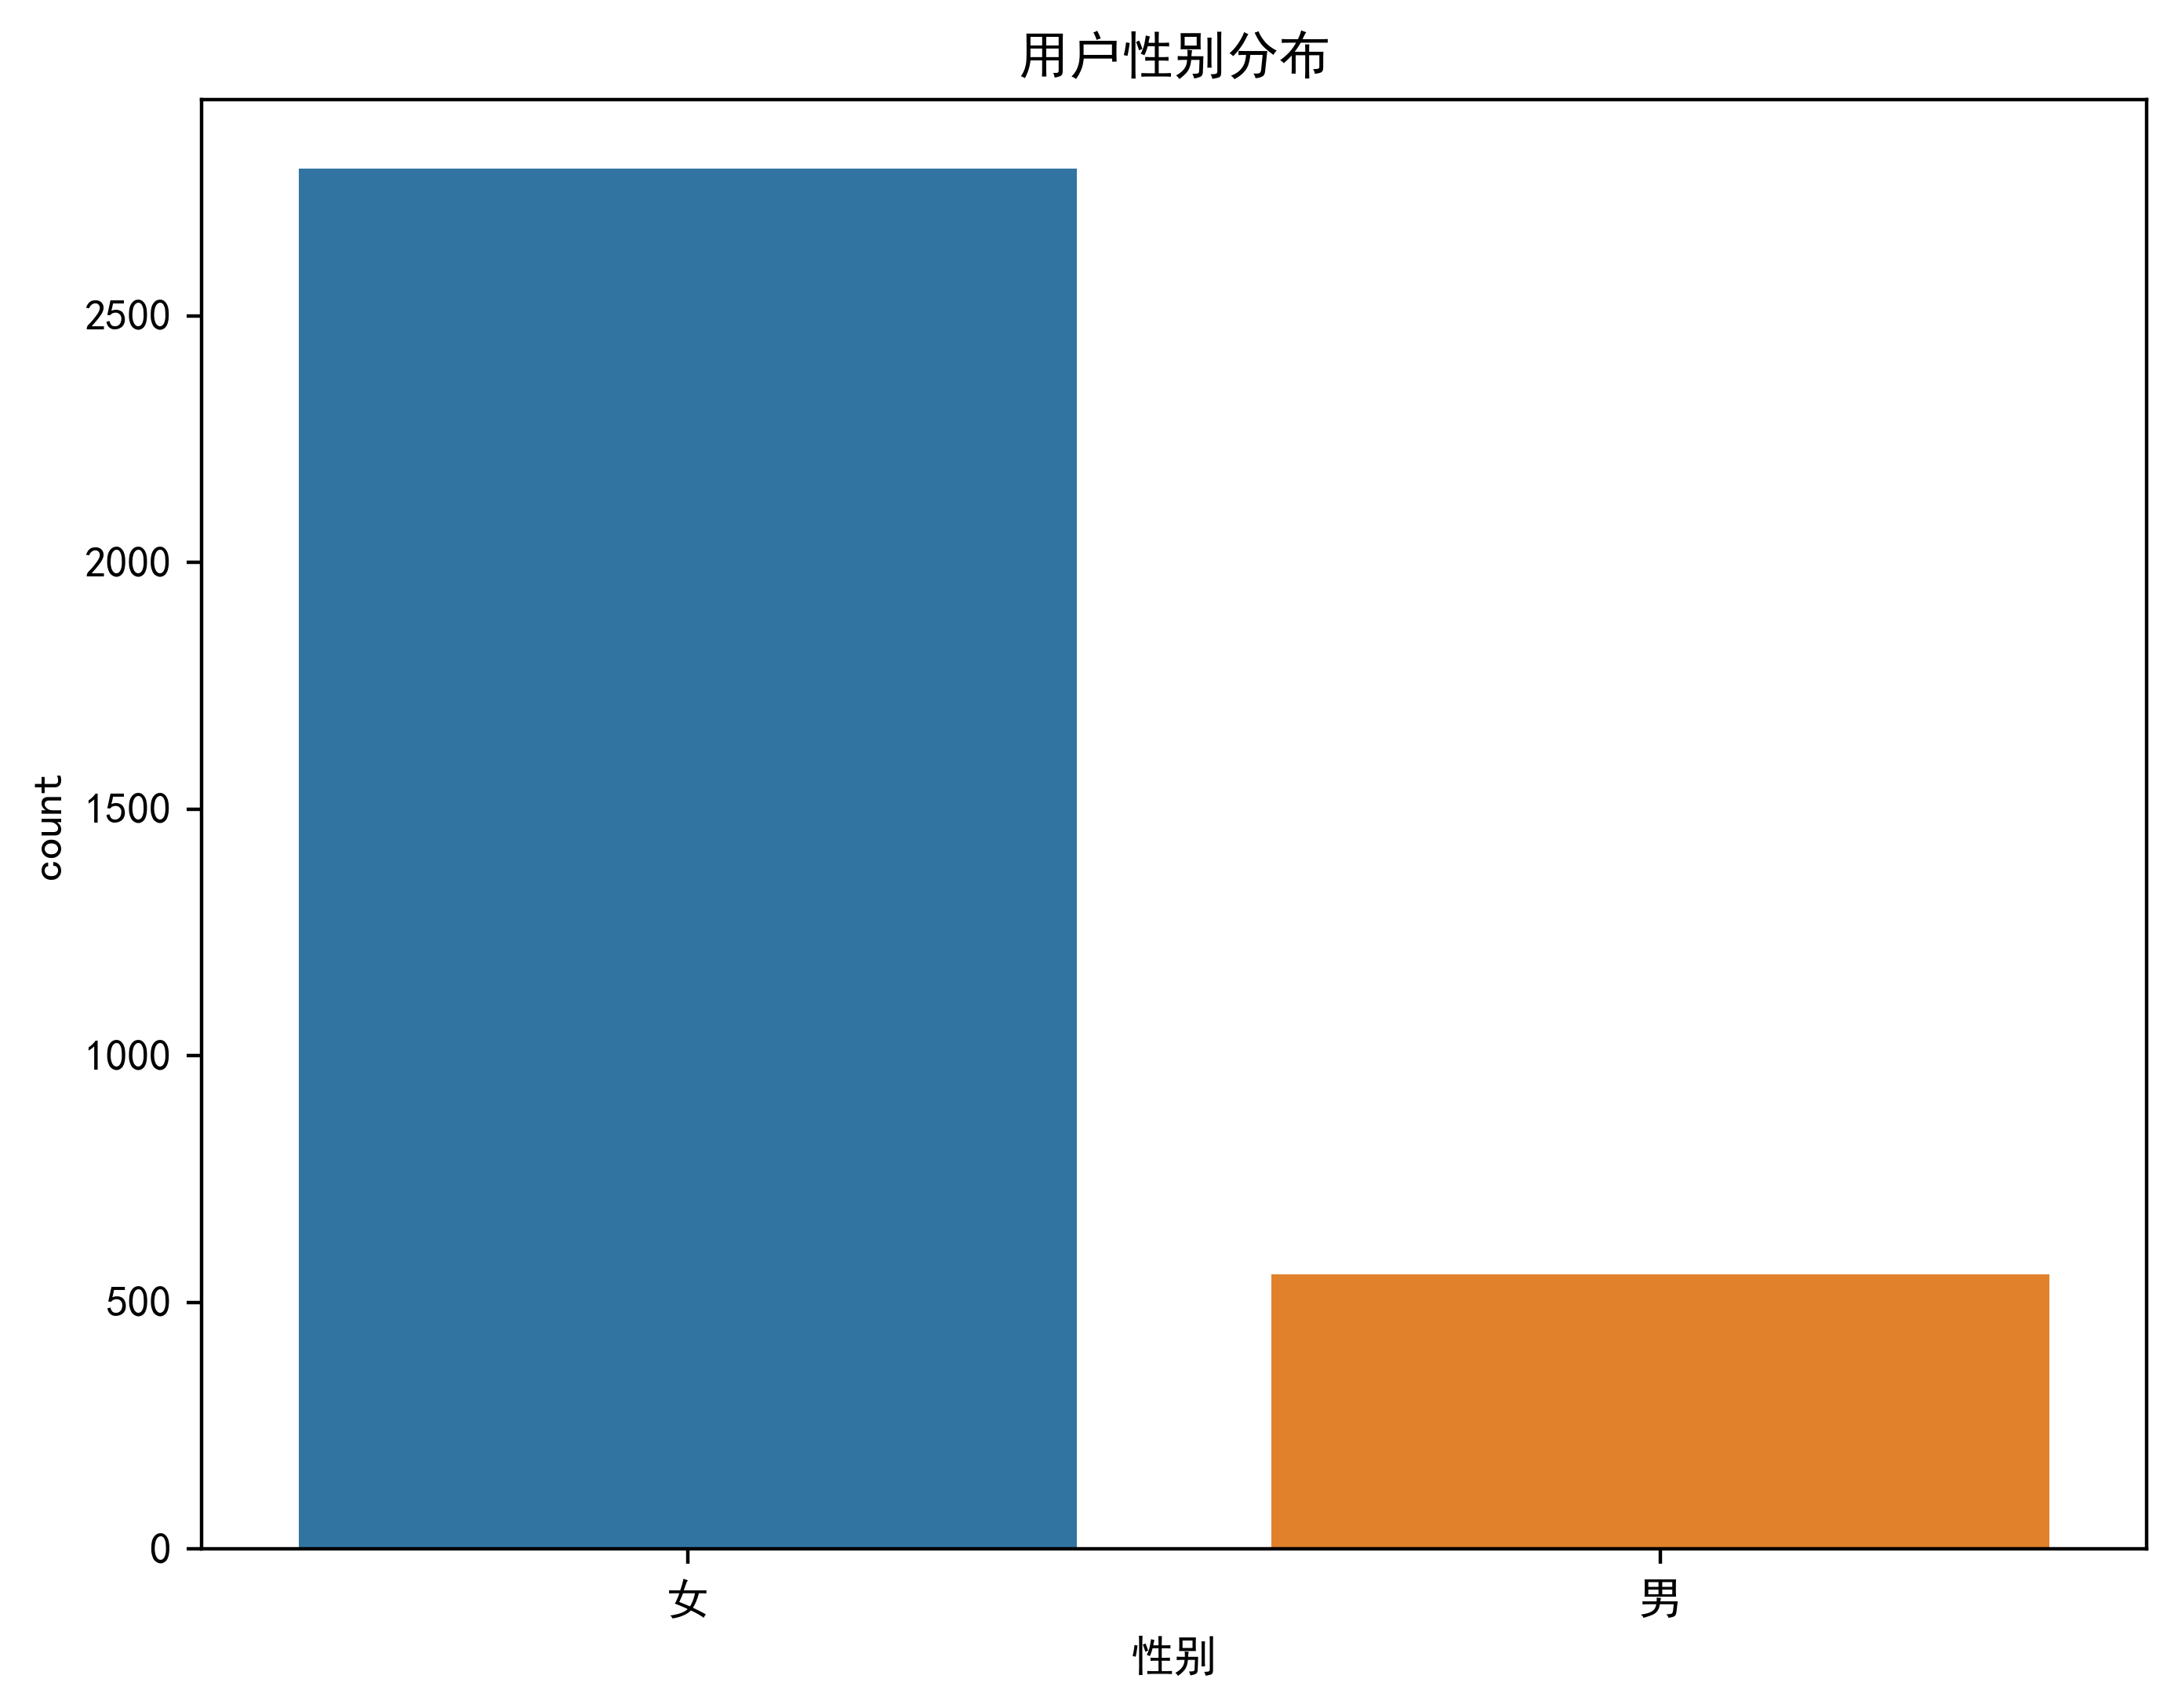

In [8]:
#用户性别分布
plt.figure(figsize=(8,6))
sns.countplot(x='性别',data=data)
plt.title('用户性别分布')
plt.show()

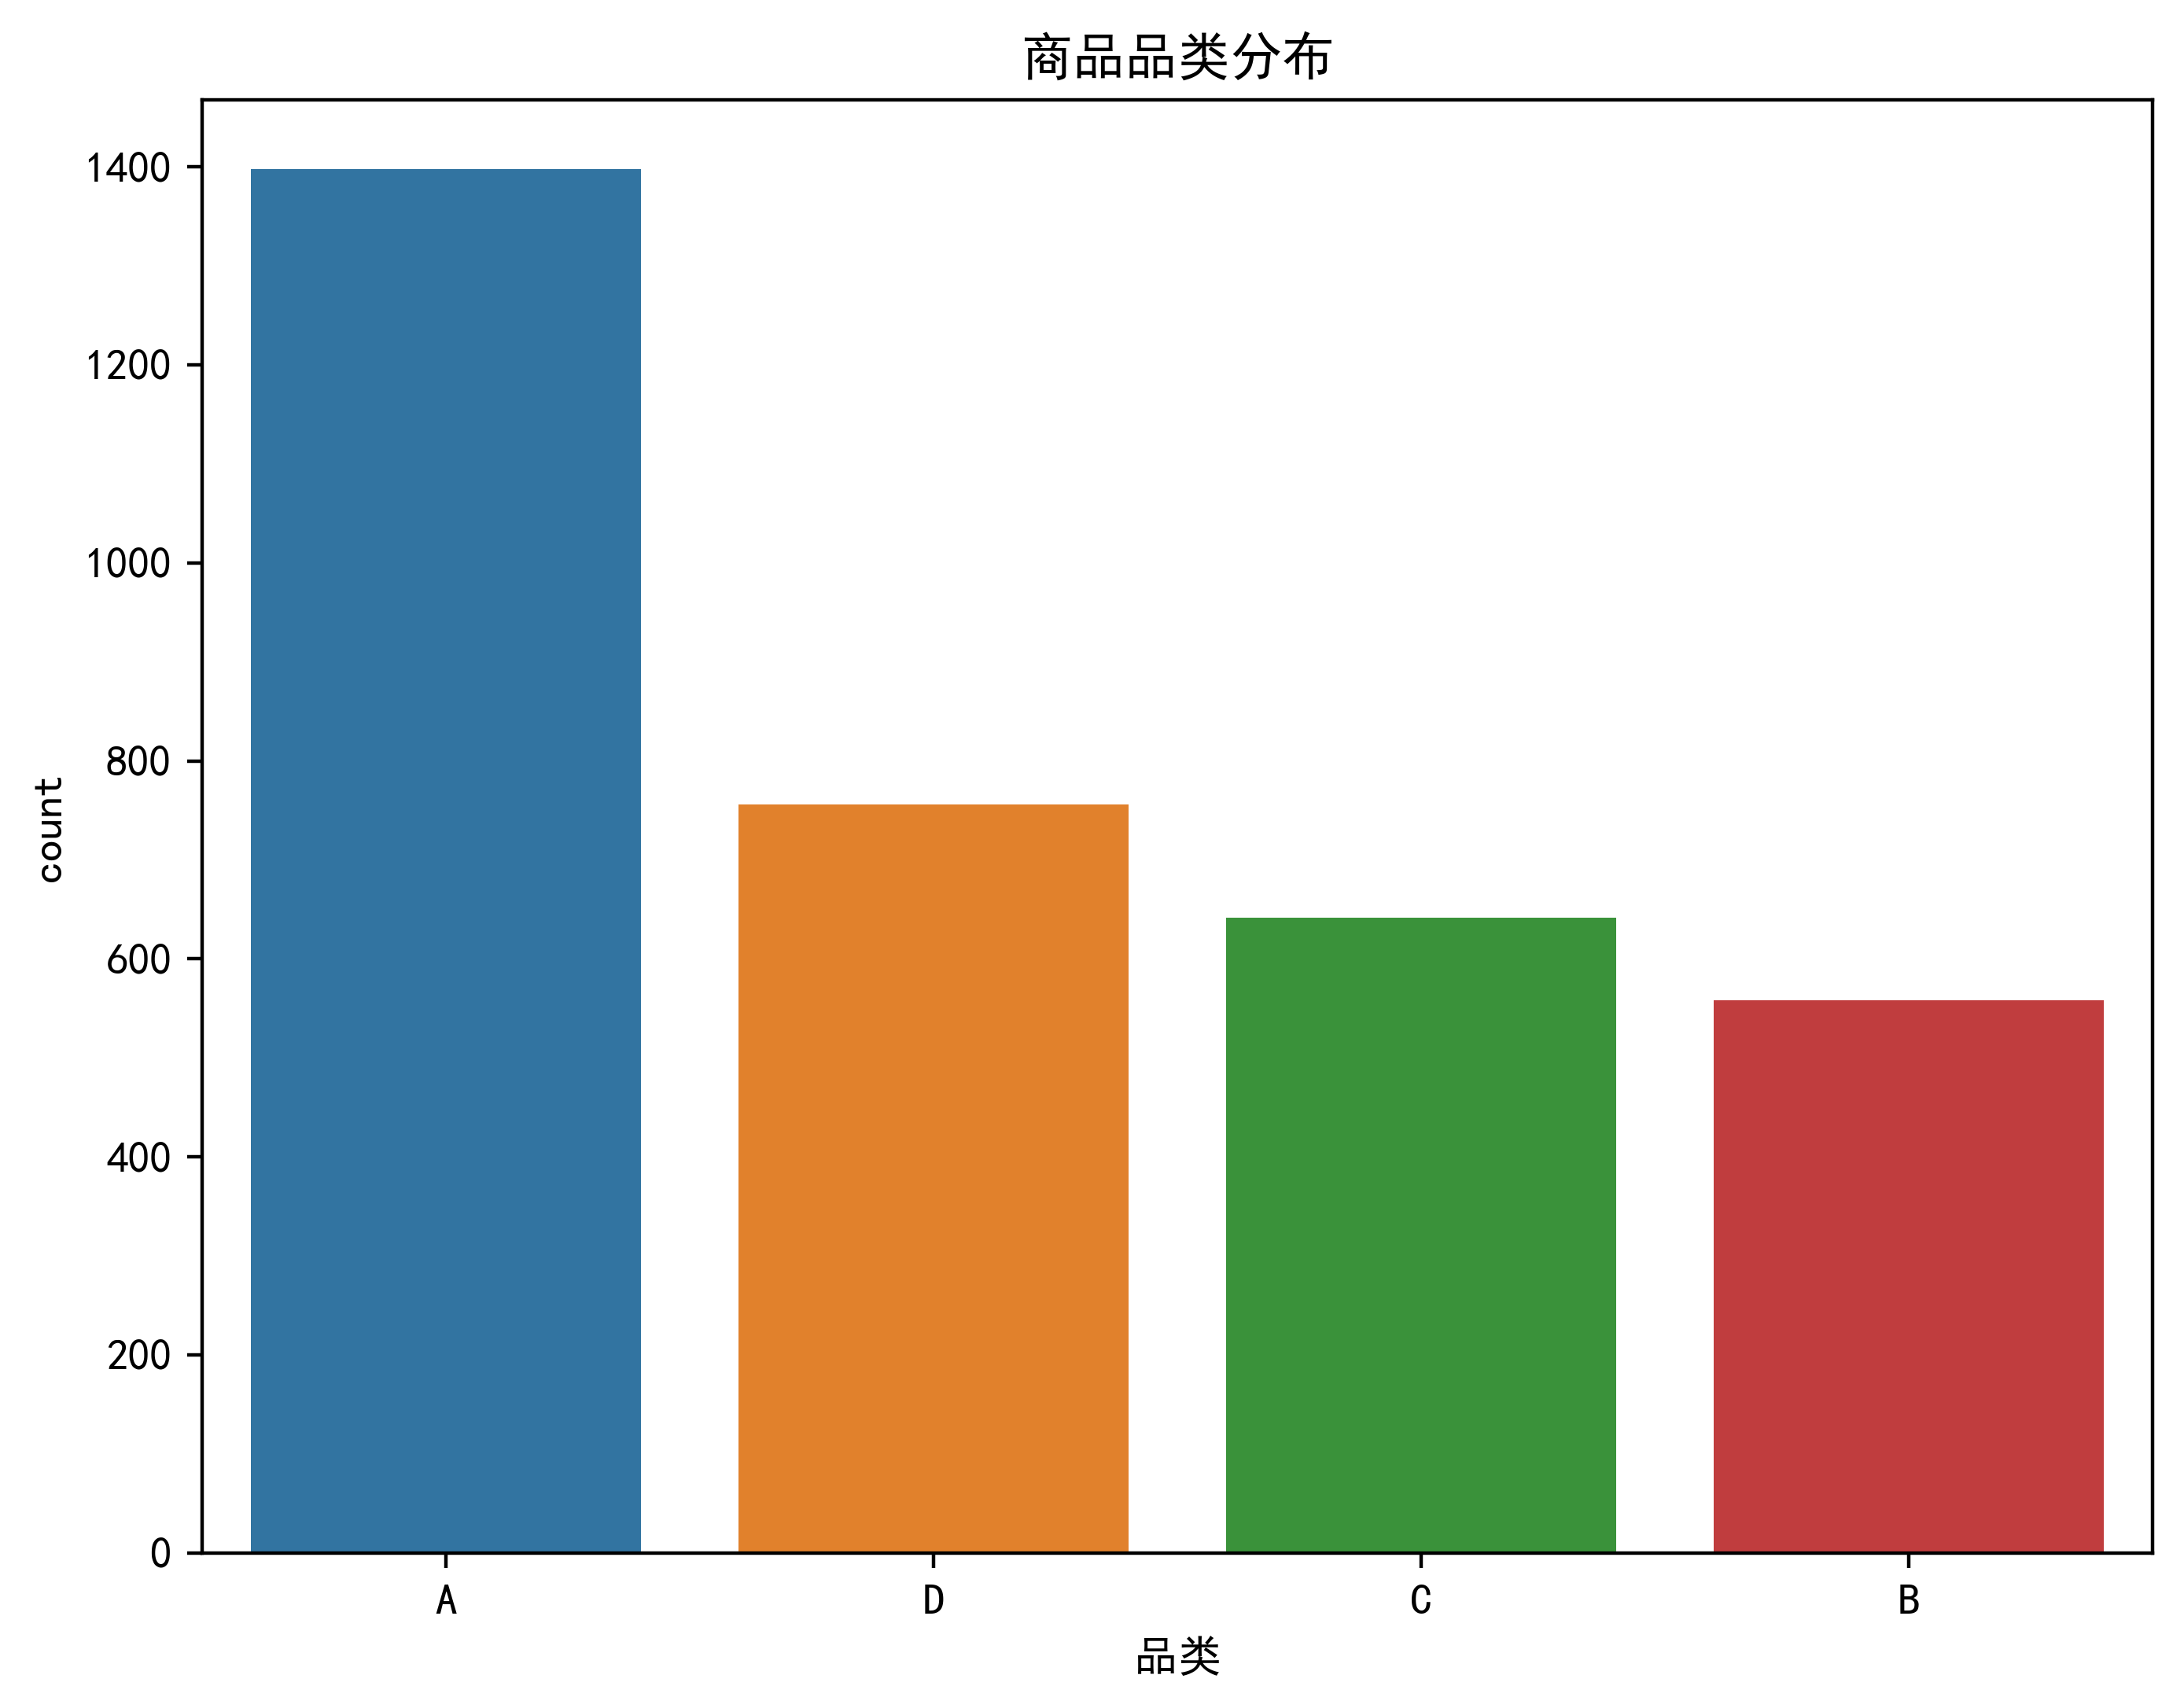

In [9]:
# 商品品类分布
plt.figure(figsize=(8,6))
sns.countplot(x='品类',data=data)
plt.title('商品品类分布')
plt.show()

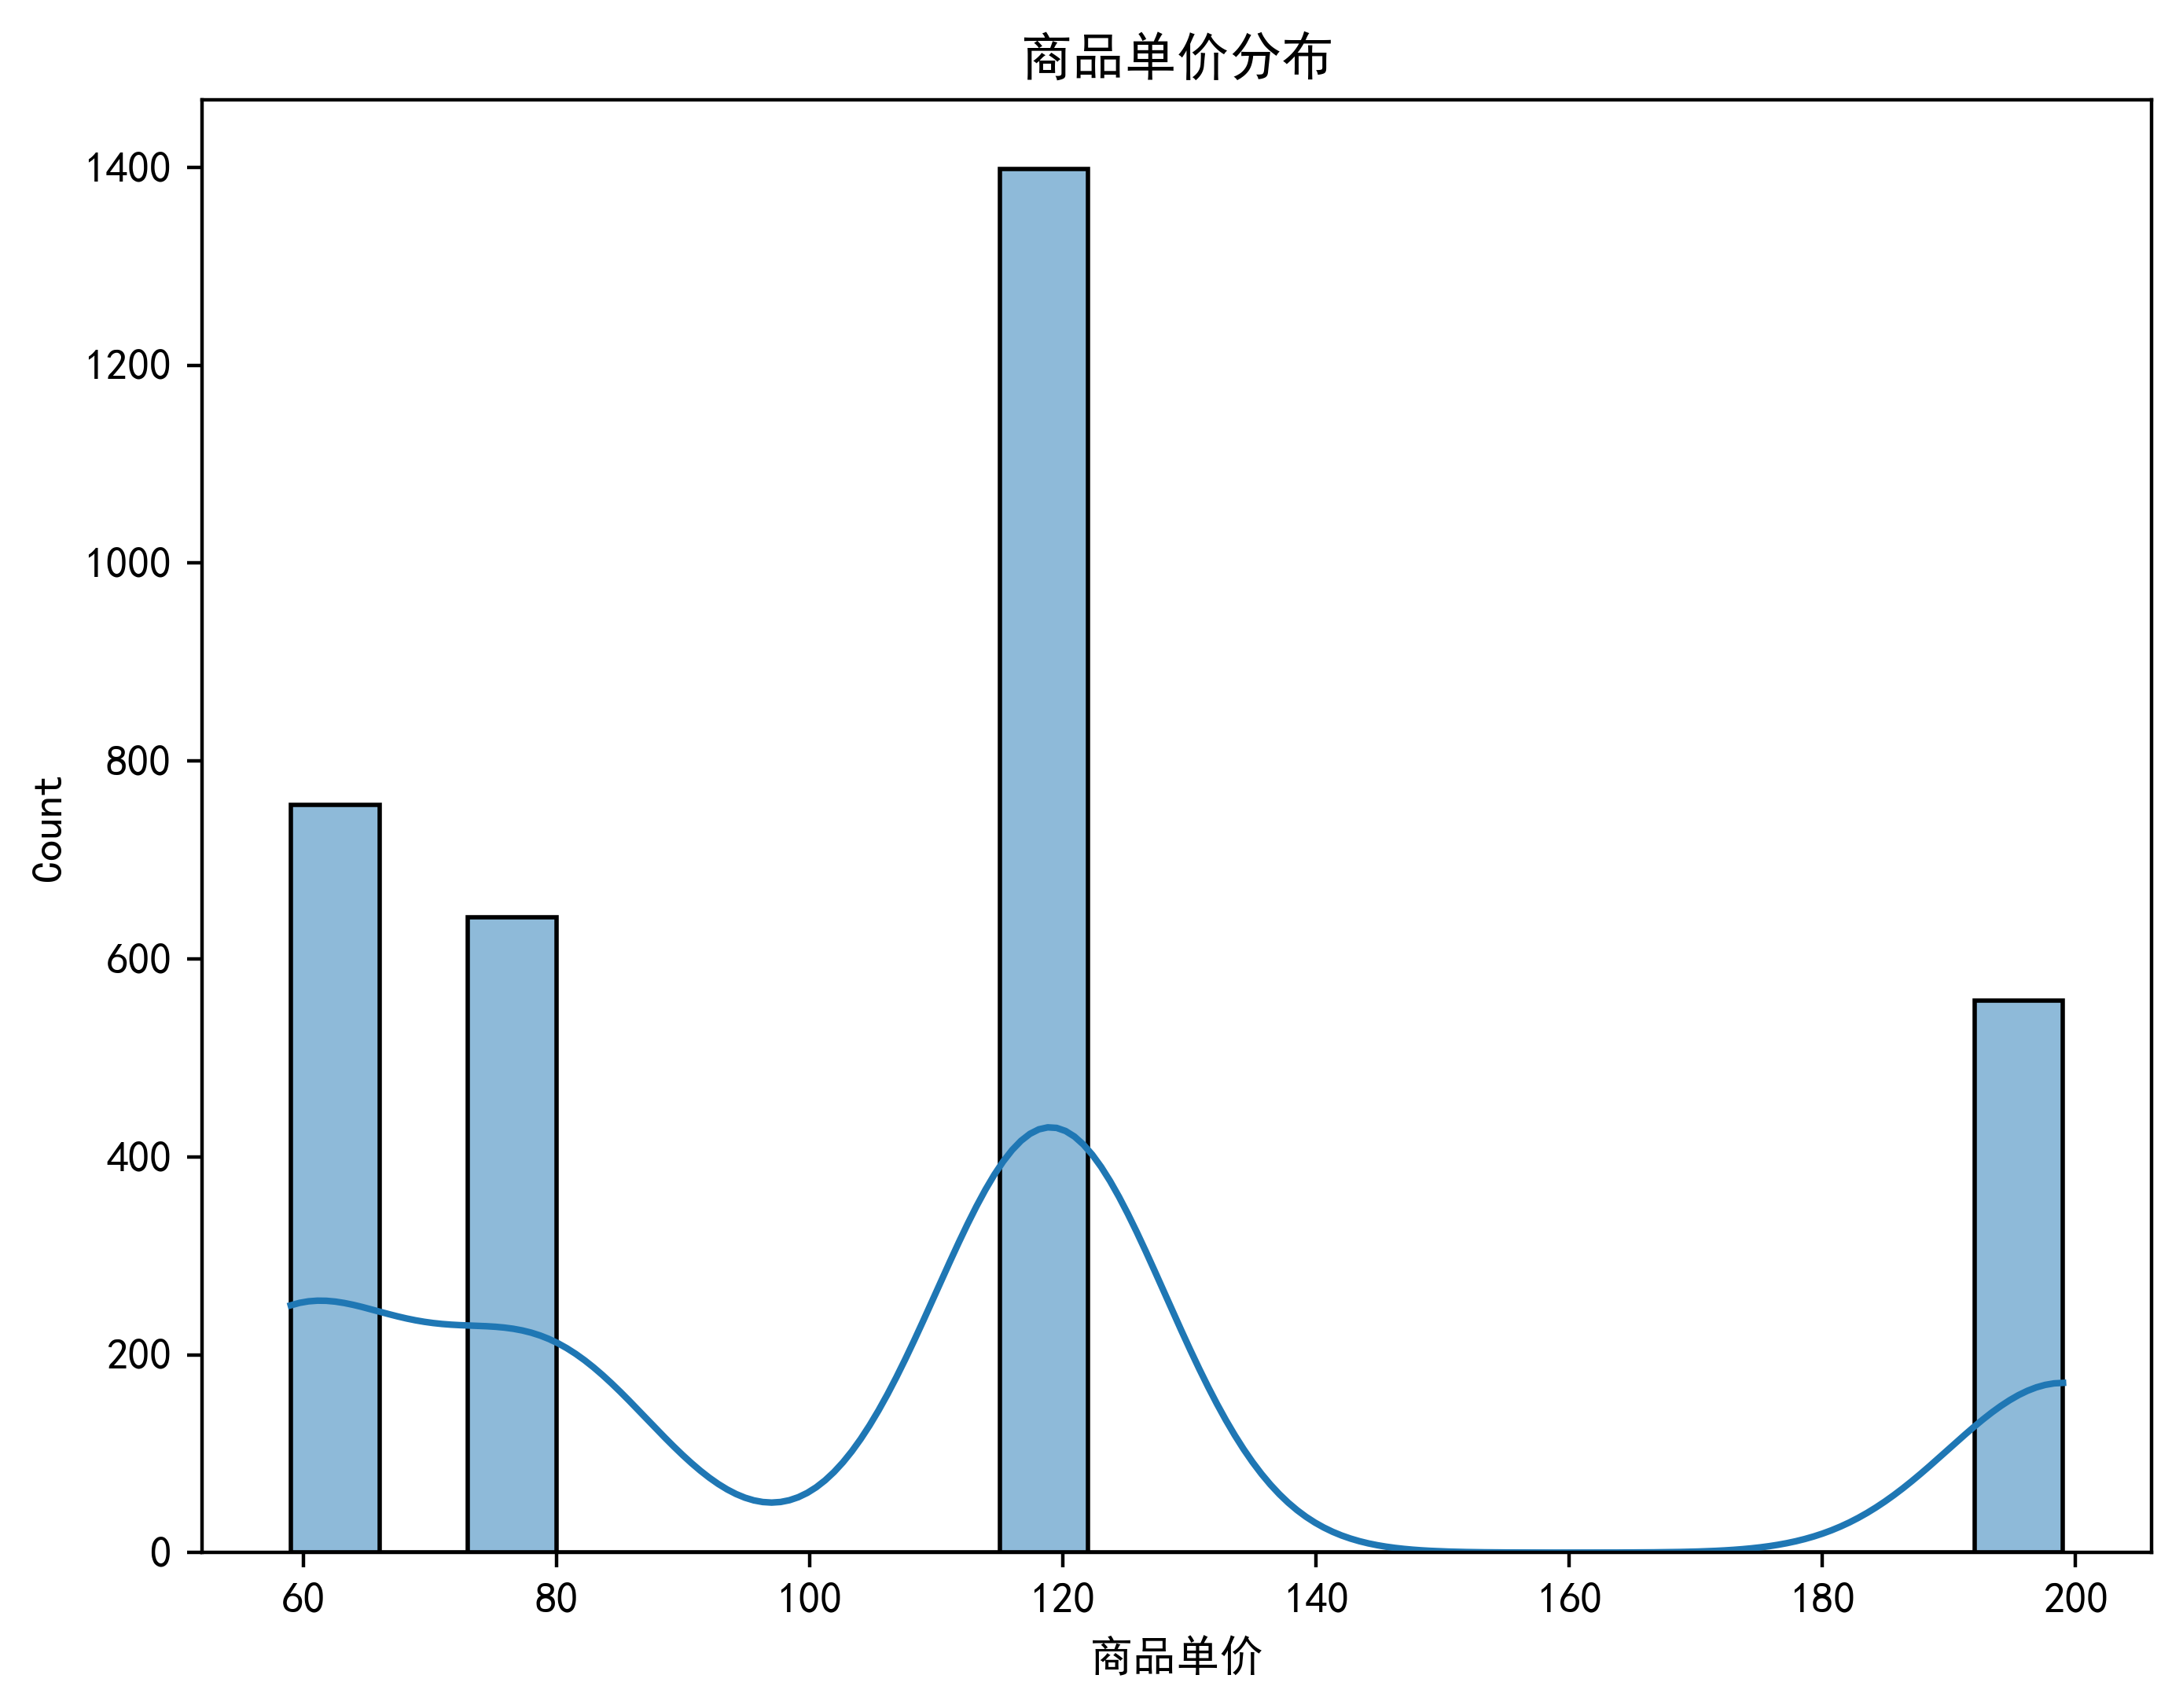

In [10]:
#商品单价分布
plt.figure(figsize=(8,6))
sns.histplot(data['商品单价'],bins=20,kde=True)
plt.title('商品单价分布')
plt.show()


这段代码使用了 Matplotlib 的 plt.figure() 函数设置了一个新的图形窗口，其大小为 8 英寸宽、6 英寸高。接下来结合 seaborn 库中的 sns.histplot() 函数绘制了一个分布图。

sns.histplot(data['商品单价'], bins=20, kde=True) 这行代码的具体含义是：

data['商品单价']: 表示从名为 data 的数据集中提取“商品单价”这一列的数据。
bins=20: 指定直方图的组数或桶的数量，即数据将被分成20个区间（bin）来展示频率分布。
kde=True: 启用了核密度估计（Kernel Density Estimation, KDE），会在直方图上方叠加一个平滑的曲线，以可视化数据的概率密度分布。
综上所述，这段代码生成的是一个混合了直方图和核密度曲线的商品单价分布图，可以清晰地展示数据集中商品单价变量的分布情况以及密度趋势。





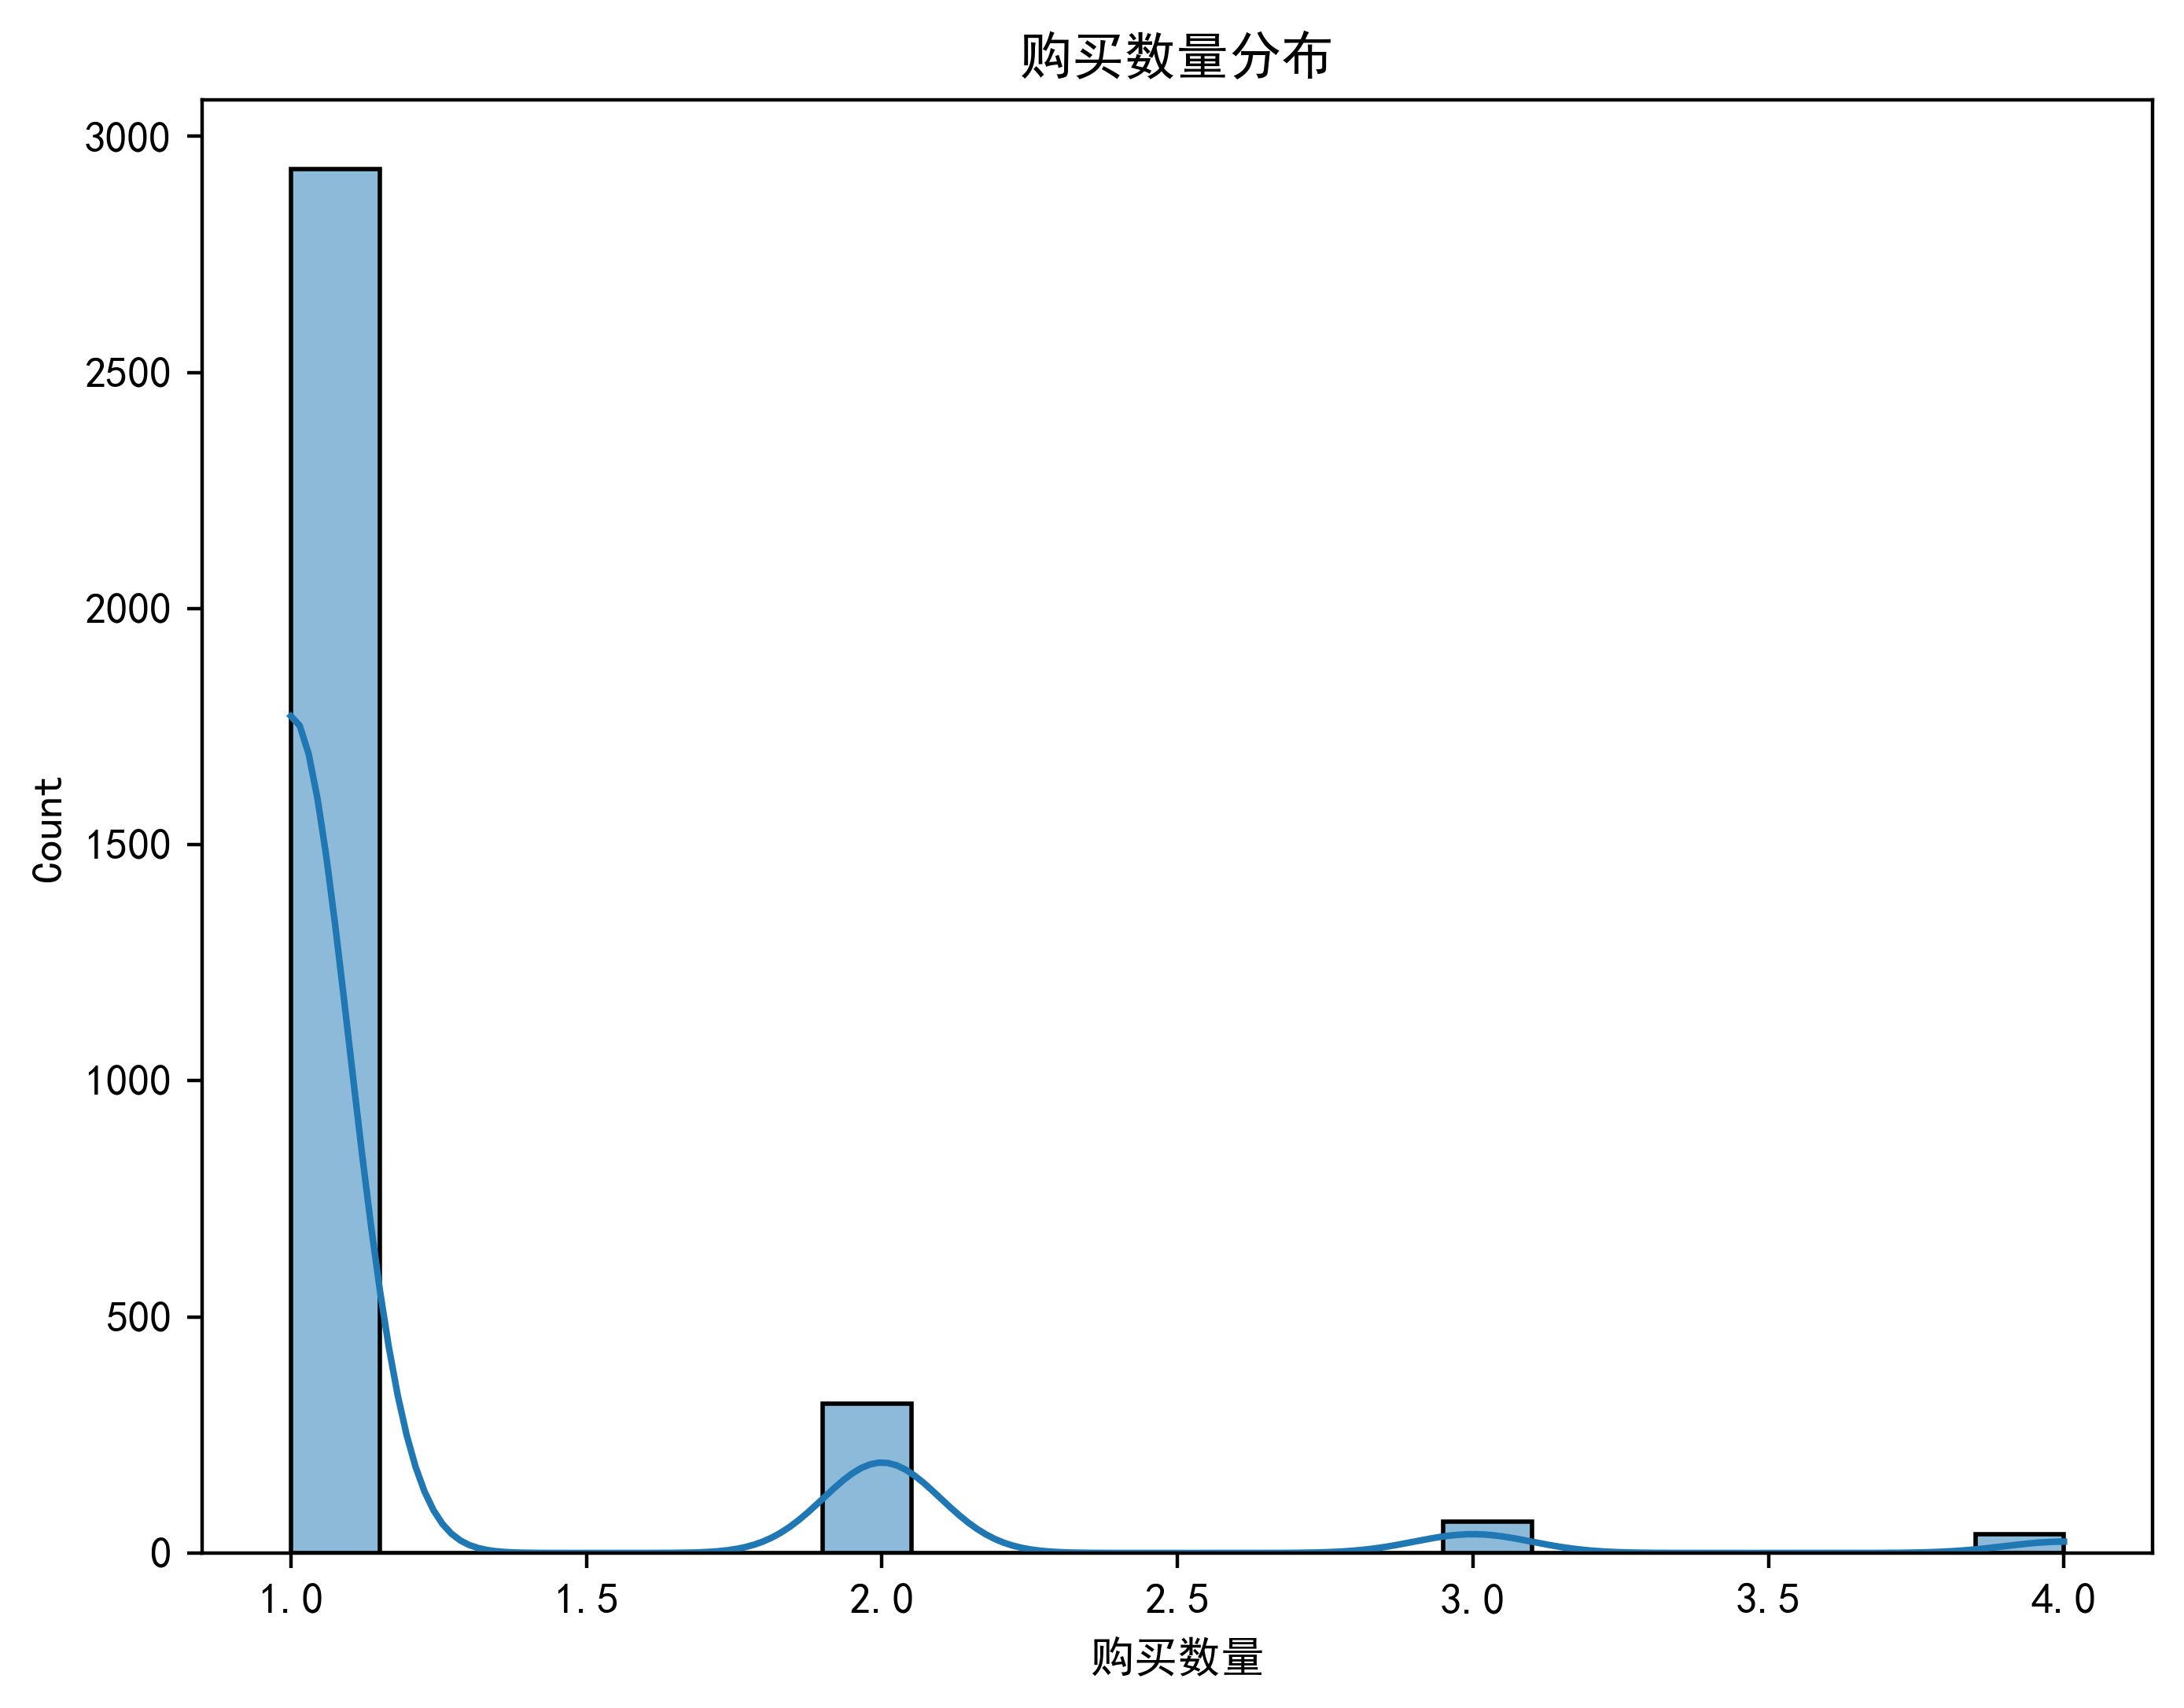

In [11]:
#购买数量分布
plt.figure(figsize=(8,6))
sns.histplot(data['购买数量'],bins=20,kde=True)
plt.title('购买数量分布')
plt.show()

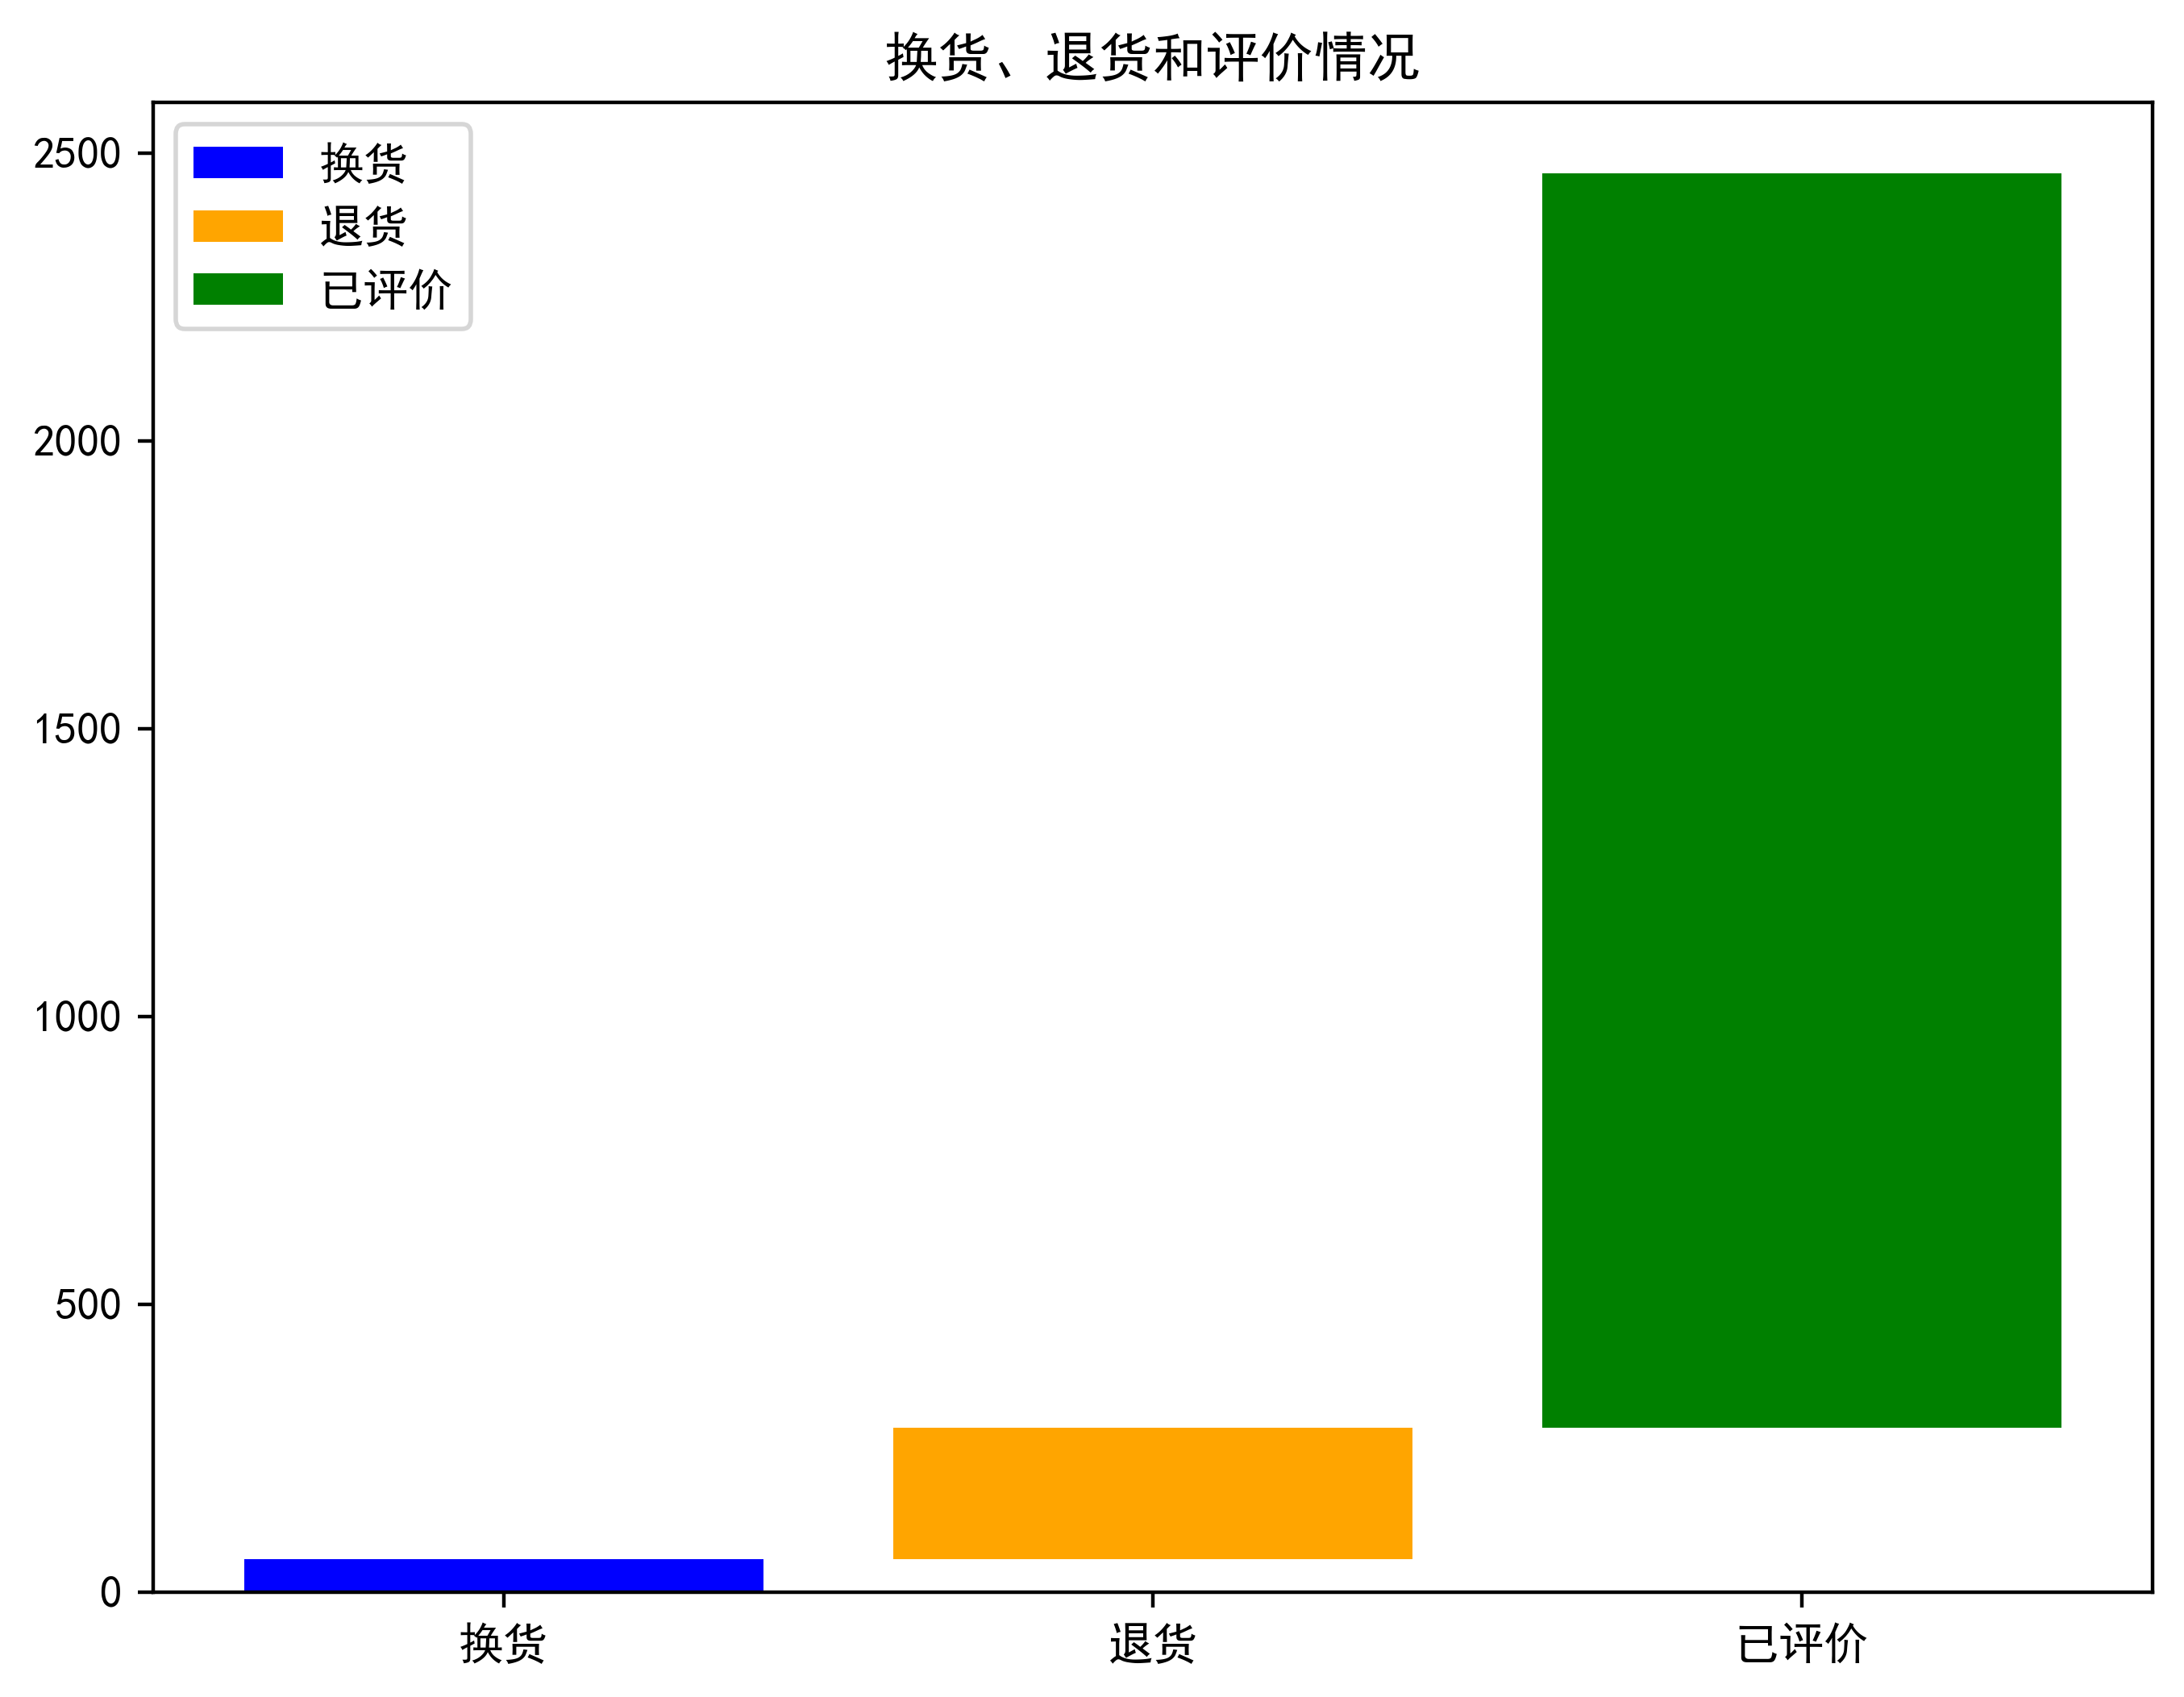

In [12]:
# 换货、退货和评价情况
plt.figure(figsize=(8, 6))

# 为了制作堆叠条形图，需要计算每个类别的总数
total_exchange = data['换货'].sum()
total_return = data['退货'].sum()
total_review = data['已评价'].sum()

# 创建条形图
plt.bar('换货', total_exchange, color='blue')
plt.bar('退货', total_return, bottom=total_exchange, color='orange')
plt.bar('已评价', total_review, bottom=total_exchange + total_return, color='green')

plt.title('换货、退货和评价情况')
plt.legend(['换货', '退货', '已评价'])
plt.show()

# 三、品类销售效果评估
我们将就如下几个问题进行探索：不同品类商品的销售额和销售数量
有何差异？哪些品类是店铺的主要销售亮点，哪些品类可能需要更多
的关注和促销？

我们可以按照下面的思路来进行问题解决：

首先我们可以为数据集新增一个字段”销售额“，通过将每个订单的
“商品单价”和“购买数量”相乘来计算，然后使用groupby方法按“
品类”分组，然后分别计算每个品类的总销售额和总销售数量，然后
根据总销售额和总销售数量对结果进行排序，以便更容易识别表现最
好和最差的品类，然后我们可以利用一个双轴图表将结果进行可视化
展示出来更加直观


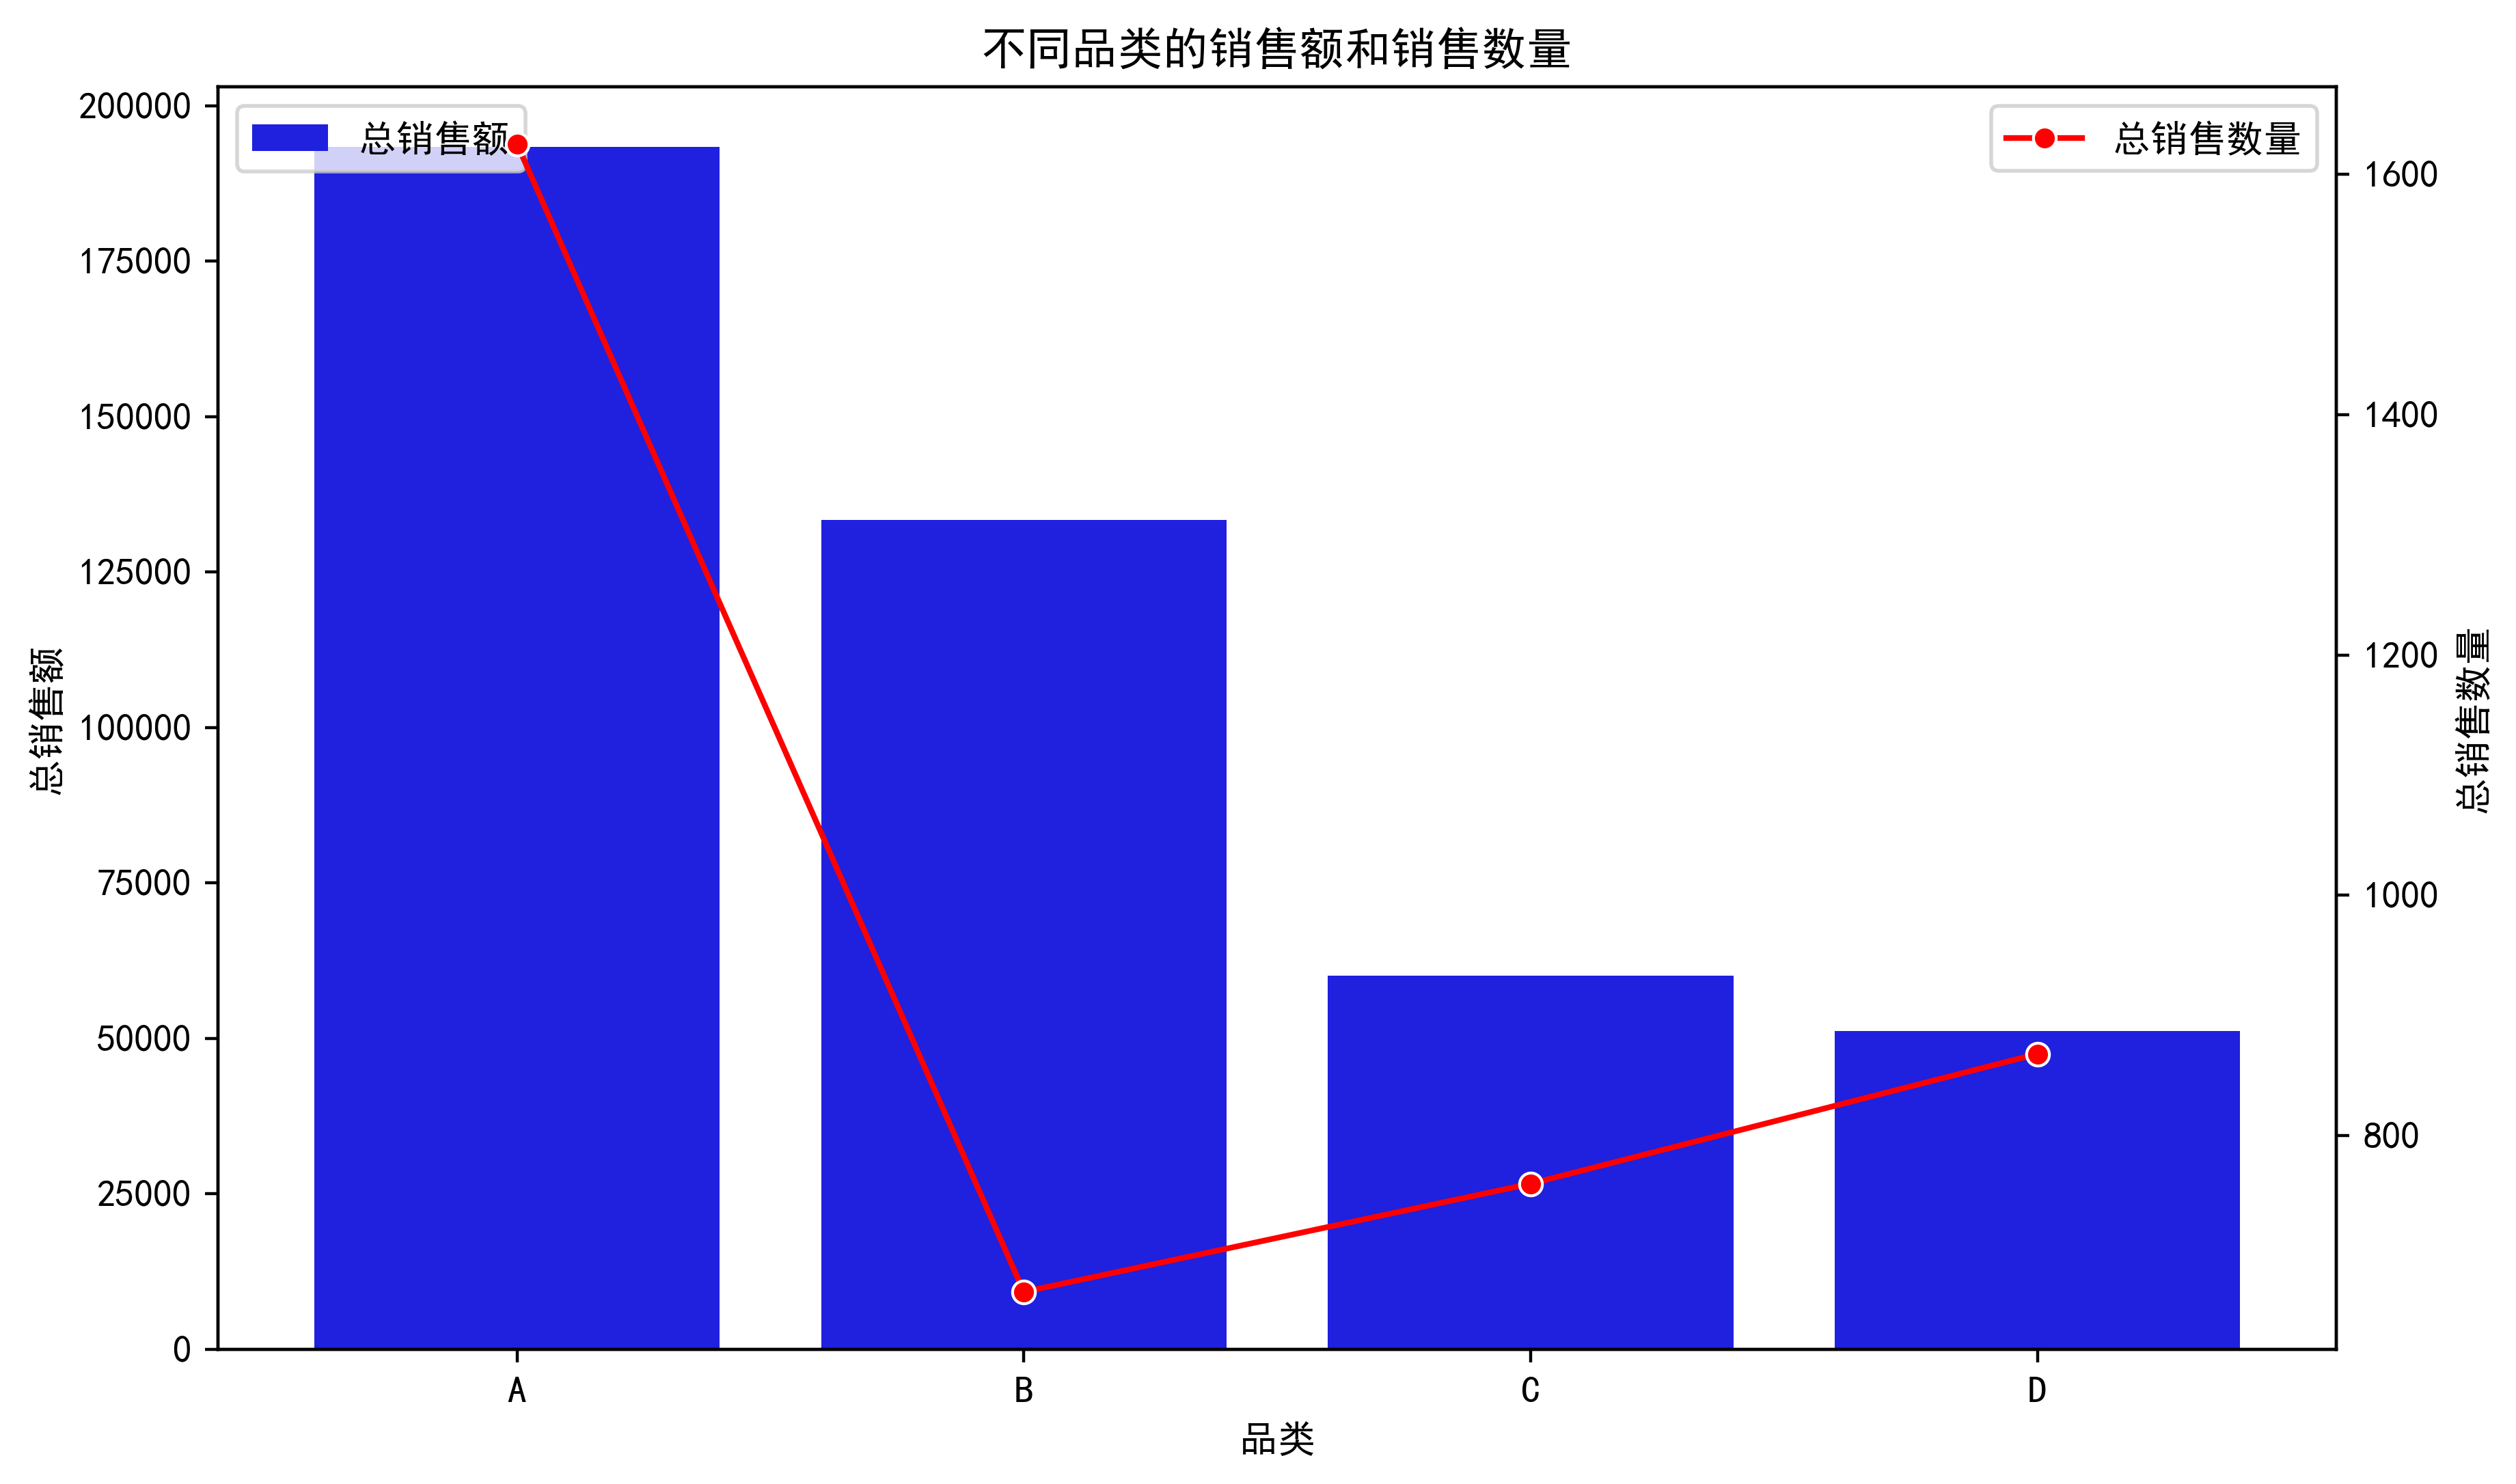

,品类,总销售额,总销售数量
0,A,193375,1625
1,B,133330,670
2,C,60040,760
3,D,51212,868


In [13]:
# 计算每个品类的销售额和销售数量
# 首先，计算每个订单的销售额（商品单价 * 购买数量）
data['销售额'] = data['商品单价'] * data['购买数量']

# 按品类分组，并计算每个品类的销售额和销售数量
category_sales = data.groupby('品类').agg(总销售额=pd.NamedAgg(column='销售额', aggfunc='sum'),
                                      总销售数量=pd.NamedAgg(column='购买数量', aggfunc='sum')).reset_index()

# 根据销售额和销售数量排序
category_sales = category_sales.sort_values(by=['总销售额', '总销售数量'], ascending=False)

# 可视化不同品类的销售额和销售数量
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
sns.barplot(x='品类', y='总销售额', data=category_sales, ax=ax1, color='b', label='总销售额')
sns.lineplot(x='品类', y='总销售数量', data=category_sales, ax=ax2, color='r', marker='o', label='总销售数量')

ax1.set_title('不同品类的销售额和销售数量')
ax1.set_xlabel('品类')
ax1.set_ylabel('总销售额')
ax2.set_ylabel('总销售数量')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()
category_sales


根据双轴图标我们可以发现：

品类A：在图表中，品类A的柱状图（总销售额）和折线图
（总销售数量）都高于其他品类，显示了其在销售方面的明显
优势，这意味着品类A的产品非常受欢迎，销售额和销售数量均
高，是店铺的主要收入来源。

品类B：其销售额位居第二，但销售数量相比品类A较少，这可能表明
品类B的商品单价高于品类A，虽然销售数量不是最多的，但较高的单价
使得其总销售额相对较高

品类C和D：这两个品类的销售额和销售数量相对较低，特别是品类D，虽然
在销售数量上排名第二，但其总销售额却是最低的，这表明品类D的
商品单价可能较低

根据数据表我们可以发现：

品类A：总销售额为193，375，销售数量为1，625件，这显示了其在市场上的
强势地位

品类B：尽管销售数量仅为670件，总销售额却达到133，330，表明该品类的
商品具有较高的单价或较高的利润率

品类C：总销售额为60，040，销售数量为760件，位于中等水平，表明该品类的
市场表现一般

品类D：销售数量为868件，但总销售额仅为51，212，表明该品类的
单价较低或利润较小

由此可以得出品类A作为店铺的主要销售亮点，应继续保持其市场优势，并考虑增加库存和促销活动来进一步推动销售。品类B虽然销售数量较少，但高销售额表明其在特定顾客群中受欢迎，可以考虑针对该品类可能需要更多的营销推广和策略调整来提高销售额，对于品类D，
考虑提高单价或者开发更高价值的产品可能是一个策略


# 四、用户参与活动优惠的购物行为分析
有关用户参与活动优惠的购物行为的分析我们可以围绕如下几个问题
来展开探索：参与活动优惠的订单与未参与的订单相比，是否表现出
更高的购物金额和购买数量？活动优惠是否能够有效提升用户的购物
热情？

我们可以首先确保数据中的“活动优惠”字段已正确分类（如，有
优惠和无优惠）。然后对每个订单，我们已经有了“销售额”这一字段
它是通过“商品单价”和“购买数量”相乘得到的，我们将使用这个
字段来代表购物金额。然后将数据分为两组——参与活动优惠的订单和
未参与活动优惠的订单。对这两组数据，分别计算购物金额（销售额）
和购买数量的平均值。最后比较这两组数据在购物金额和购买数量上
的平均值，以判断活动优惠是否对提升用户的购物金额和购买数量有
积极影响并将使用图表来直观展示参与活动优惠与否在购物金额和
购买数量上的差异

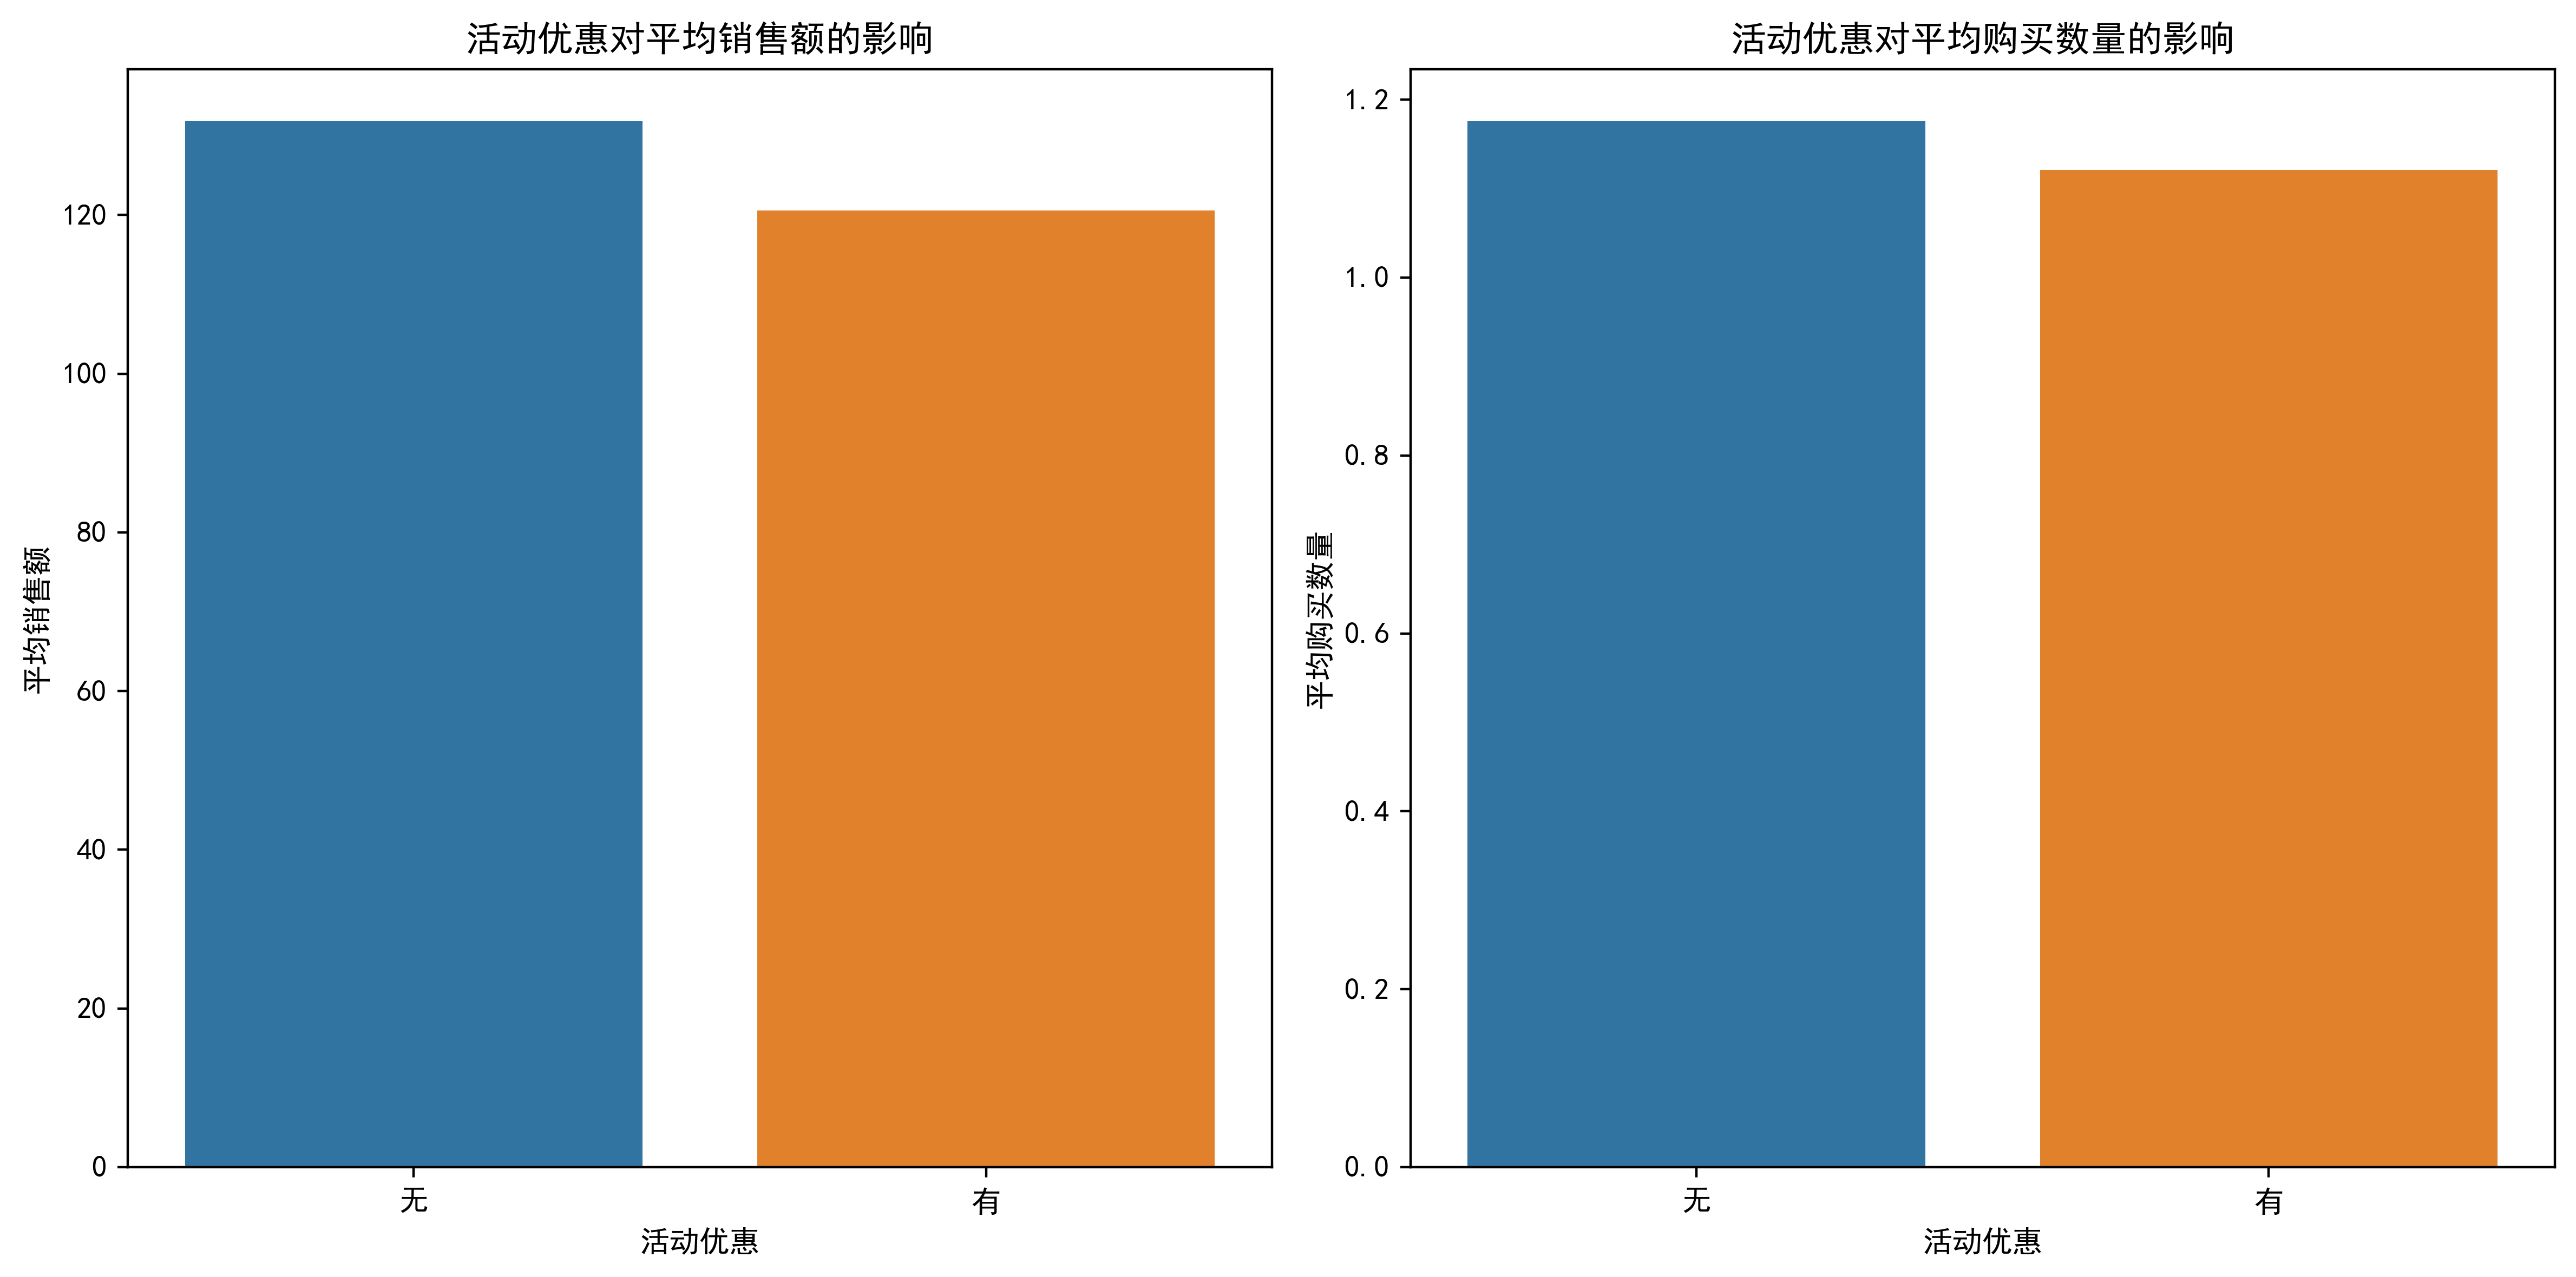

,活动优惠,平均销售额,平均购买数量
0,无,131.796724,1.175527
1,有,120.531680,1.121212


In [14]:
#分组比较参与活动优惠和未参与活动优惠的订单
grouped_data=data.groupby('活动优惠').agg(
平均销售额=pd.NamedAgg(column='销售额',aggfunc='mean'),
平均购买数量=pd.NamedAgg(column='购买数量',aggfunc='mean')
).reset_index()

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,6))

sns.barplot(x='活动优惠',y='平均销售额',data=grouped_data,ax=ax1)
ax1.set_title('活动优惠对平均销售额的影响')
ax1.set_ylabel('平均销售额')

sns.barplot(x='活动优惠',y='平均购买数量',data=grouped_data,ax=ax2)
ax2.set_title('活动优惠对平均购买数量的影响')
ax2.set_ylabel('平均购买数量')

plt.tight_layout()
plt.show()

grouped_data





从平均销售额我们可以发现参与活动优惠的订单的平均销售额为
120.53，而未参与活动优惠的订单的平均销售额未131.80，
这表明参与活动优惠的订单在平均销售额上略低于未参与活动优惠的
订单。

从平均购买数量我们可以发现参与活动优惠的订单的平均购买数量为
1.12，而未参与活动优惠的订单的平均购买数量未1.18，这里也可以
看到，参与活动优惠的订单在平均购买数量上略低与未参与优惠的订单。

根据这些结果，我们可以得出以下结论：

活动优惠对提升平均销售额和购买数量的作用不明显；反而数据显示，未参与活动
优惠的订单在这两个指标上表现略好。可能是因为活动优惠吸引了更多对
价格敏感的顾客，这些顾客倾向于购买单价较低或数量较少的商品。
或者是活动优惠的设置未能有效刺激顾客购买更多或更高价值的商品

建议商品可以从下面两个方面考虑问题：

重新设计优惠活动：考虑调整优惠活动的策略，比如提高对高价值商品
的折扣，或者设置满额赠送等，以提高每笔订单的销售额和购买数量

深入分析顾客行为，进一步分析不同顾客群体的购买行为，了解哪些类型
的优惠活动对他们更有吸引力

# 五、不同订单来源对购买行为的影响

我们可以就如下问题进行展开：订单来源是否影响购物行为，比如购买金额、
购买品类或购物频率？哪种订单来源带来的订单金额更高？

例如分析不同订单来源的平均购买金额、查看不同订单来源在各品类
商品上的销售分布抑或是分析不同订单来源的订单数量，以反映
购物频率。

我们可以使用条形图展示不同订单来源的平均购买金额、使用堆叠条形图
或分组条形图展示不同订单来源在各品类的销售分布以及展示不同订单来源的
订单数量，以反映购物频率，最后我们通过比较不同订单来源的数据，确定
哪种订单来源在购买金额、购买品类和购物频率上表现最好

In [15]:
# 按订单来源分组，计算平均购买金额
average_sales_by_source=data.groupby('订单来源').agg(
平均销售额=pd.NamedAgg(column='销售额',aggfunc='mean')).reset_index()





In [16]:
# 按订单来源和品类分组，计算销售数量
sales_by_source_category=data.groupby(['订单来源','品类']).size(
).unstack(fill_value=0)

#计算每个订单来源的订单数量
order_count_by_source=data['订单来源'].value_counts().reset_index().rename(columns={'index':'订单来源','订单来源':'订单数量'})

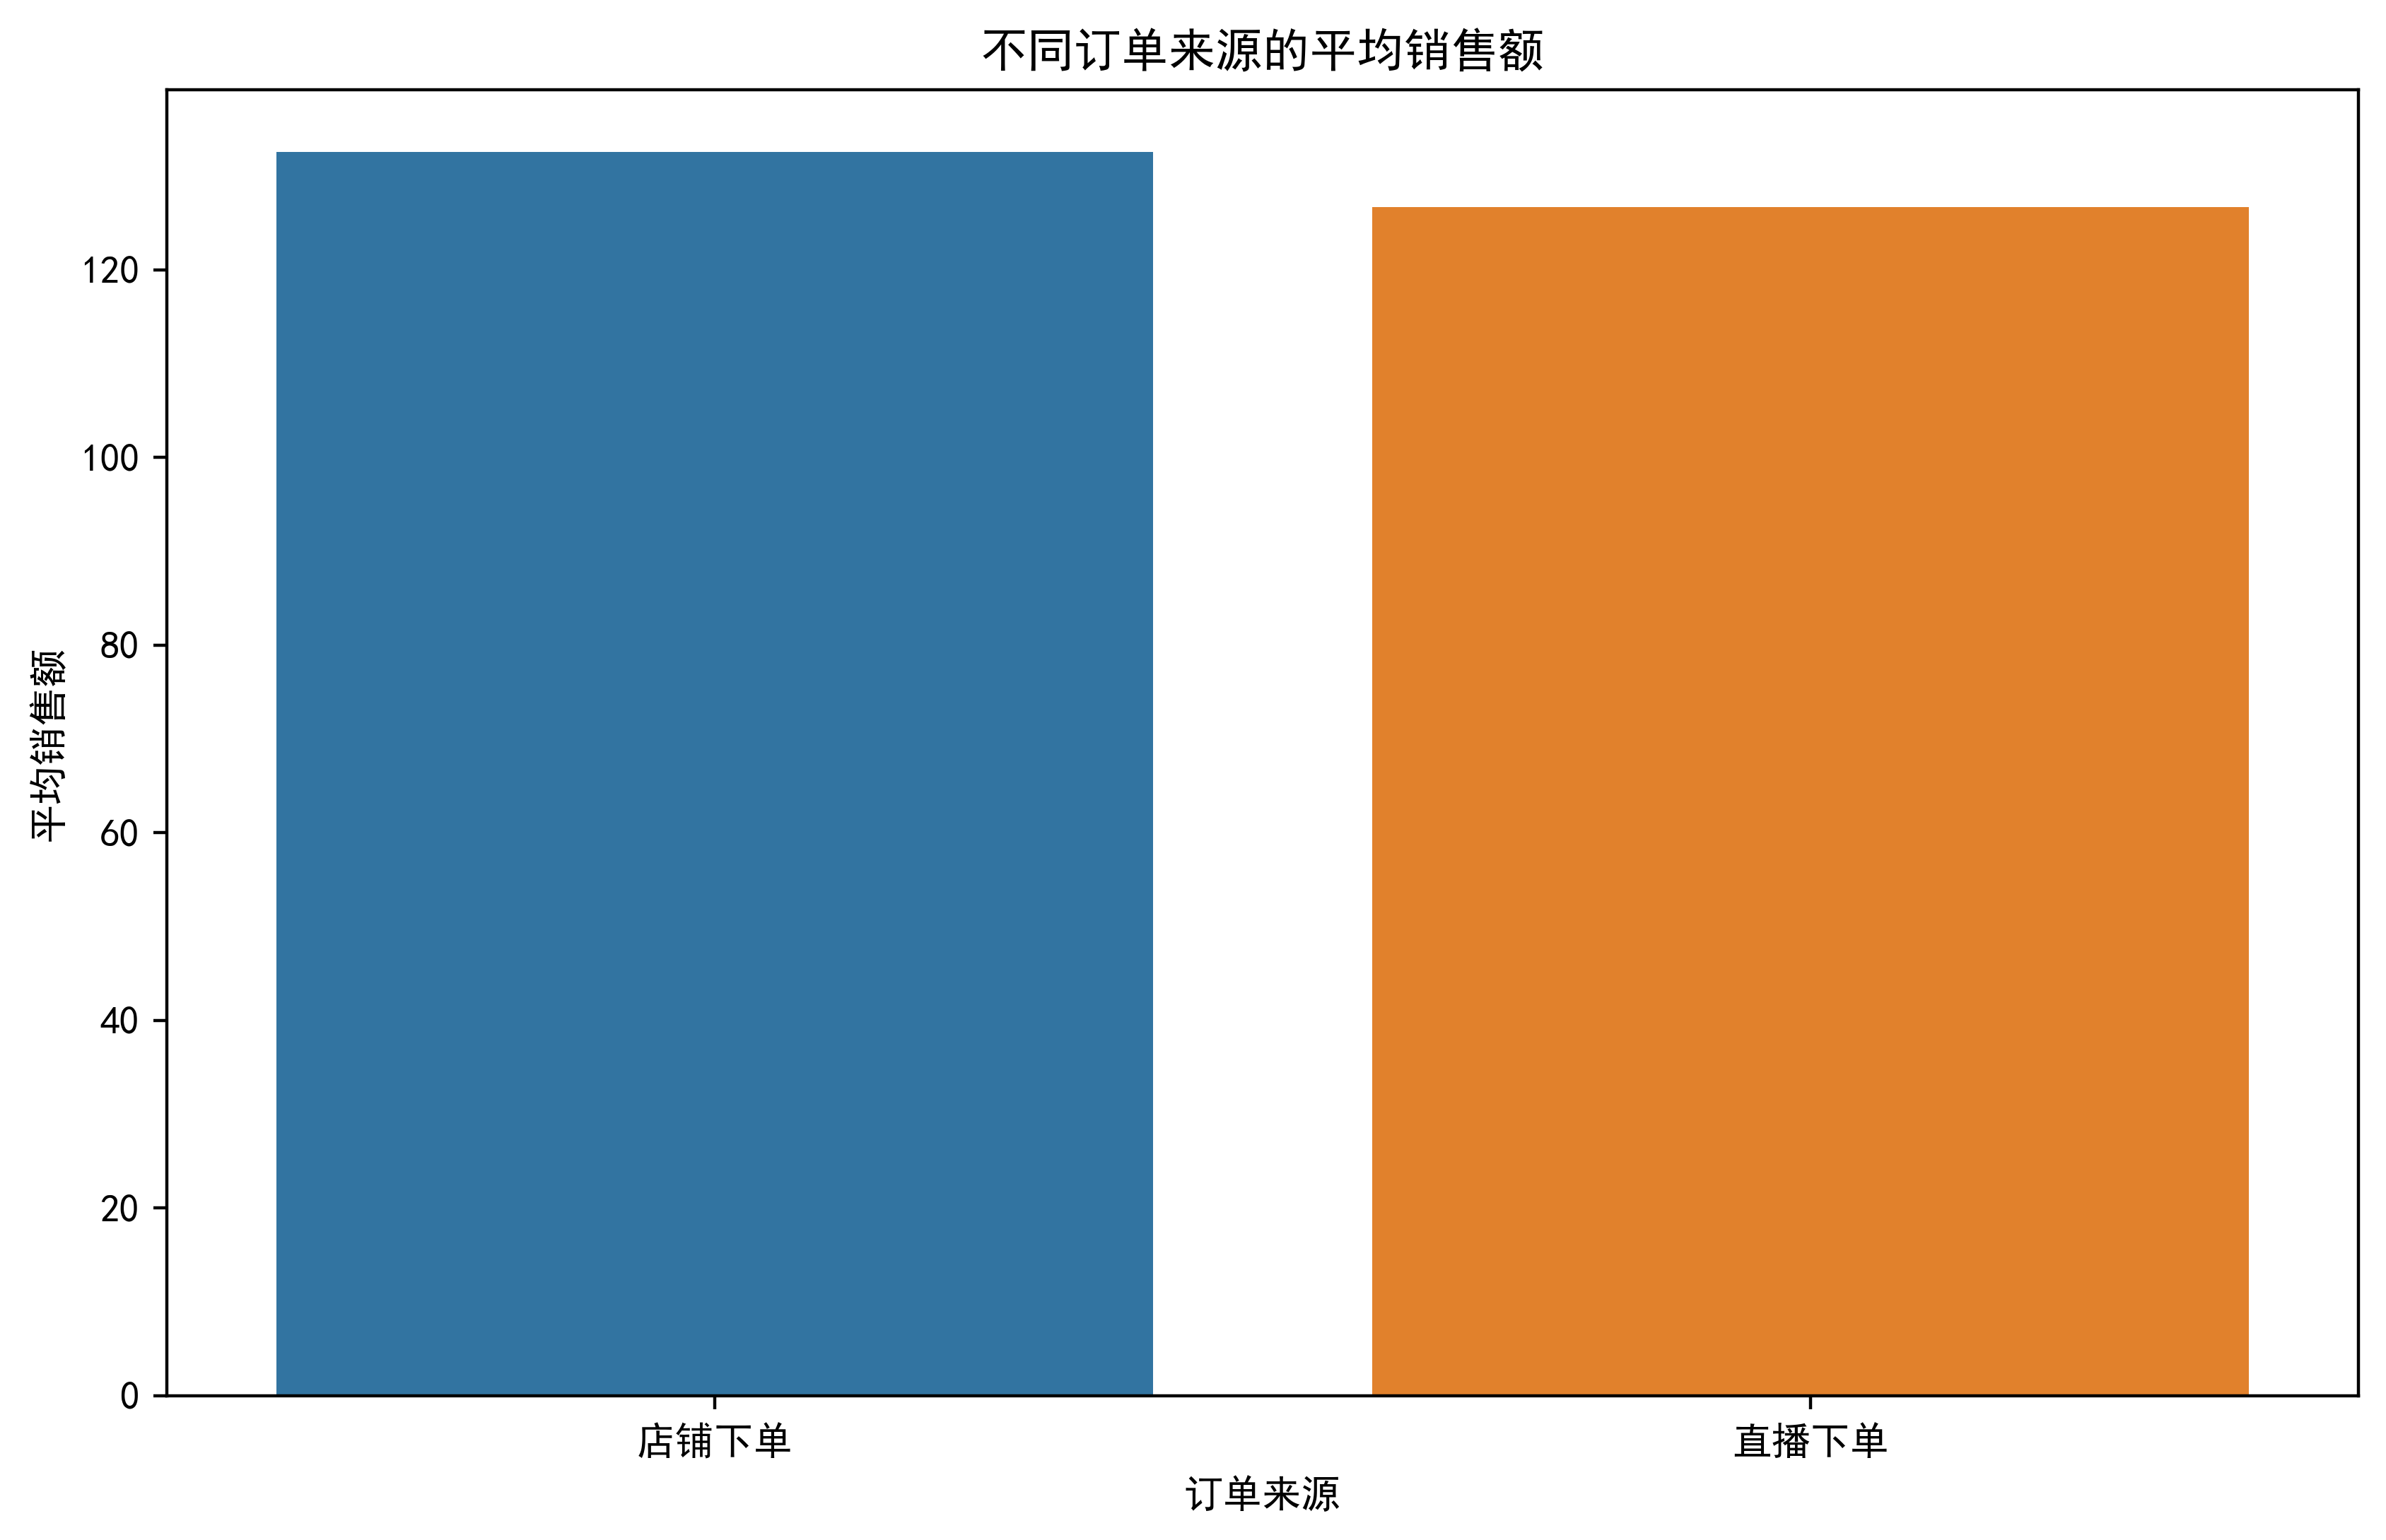

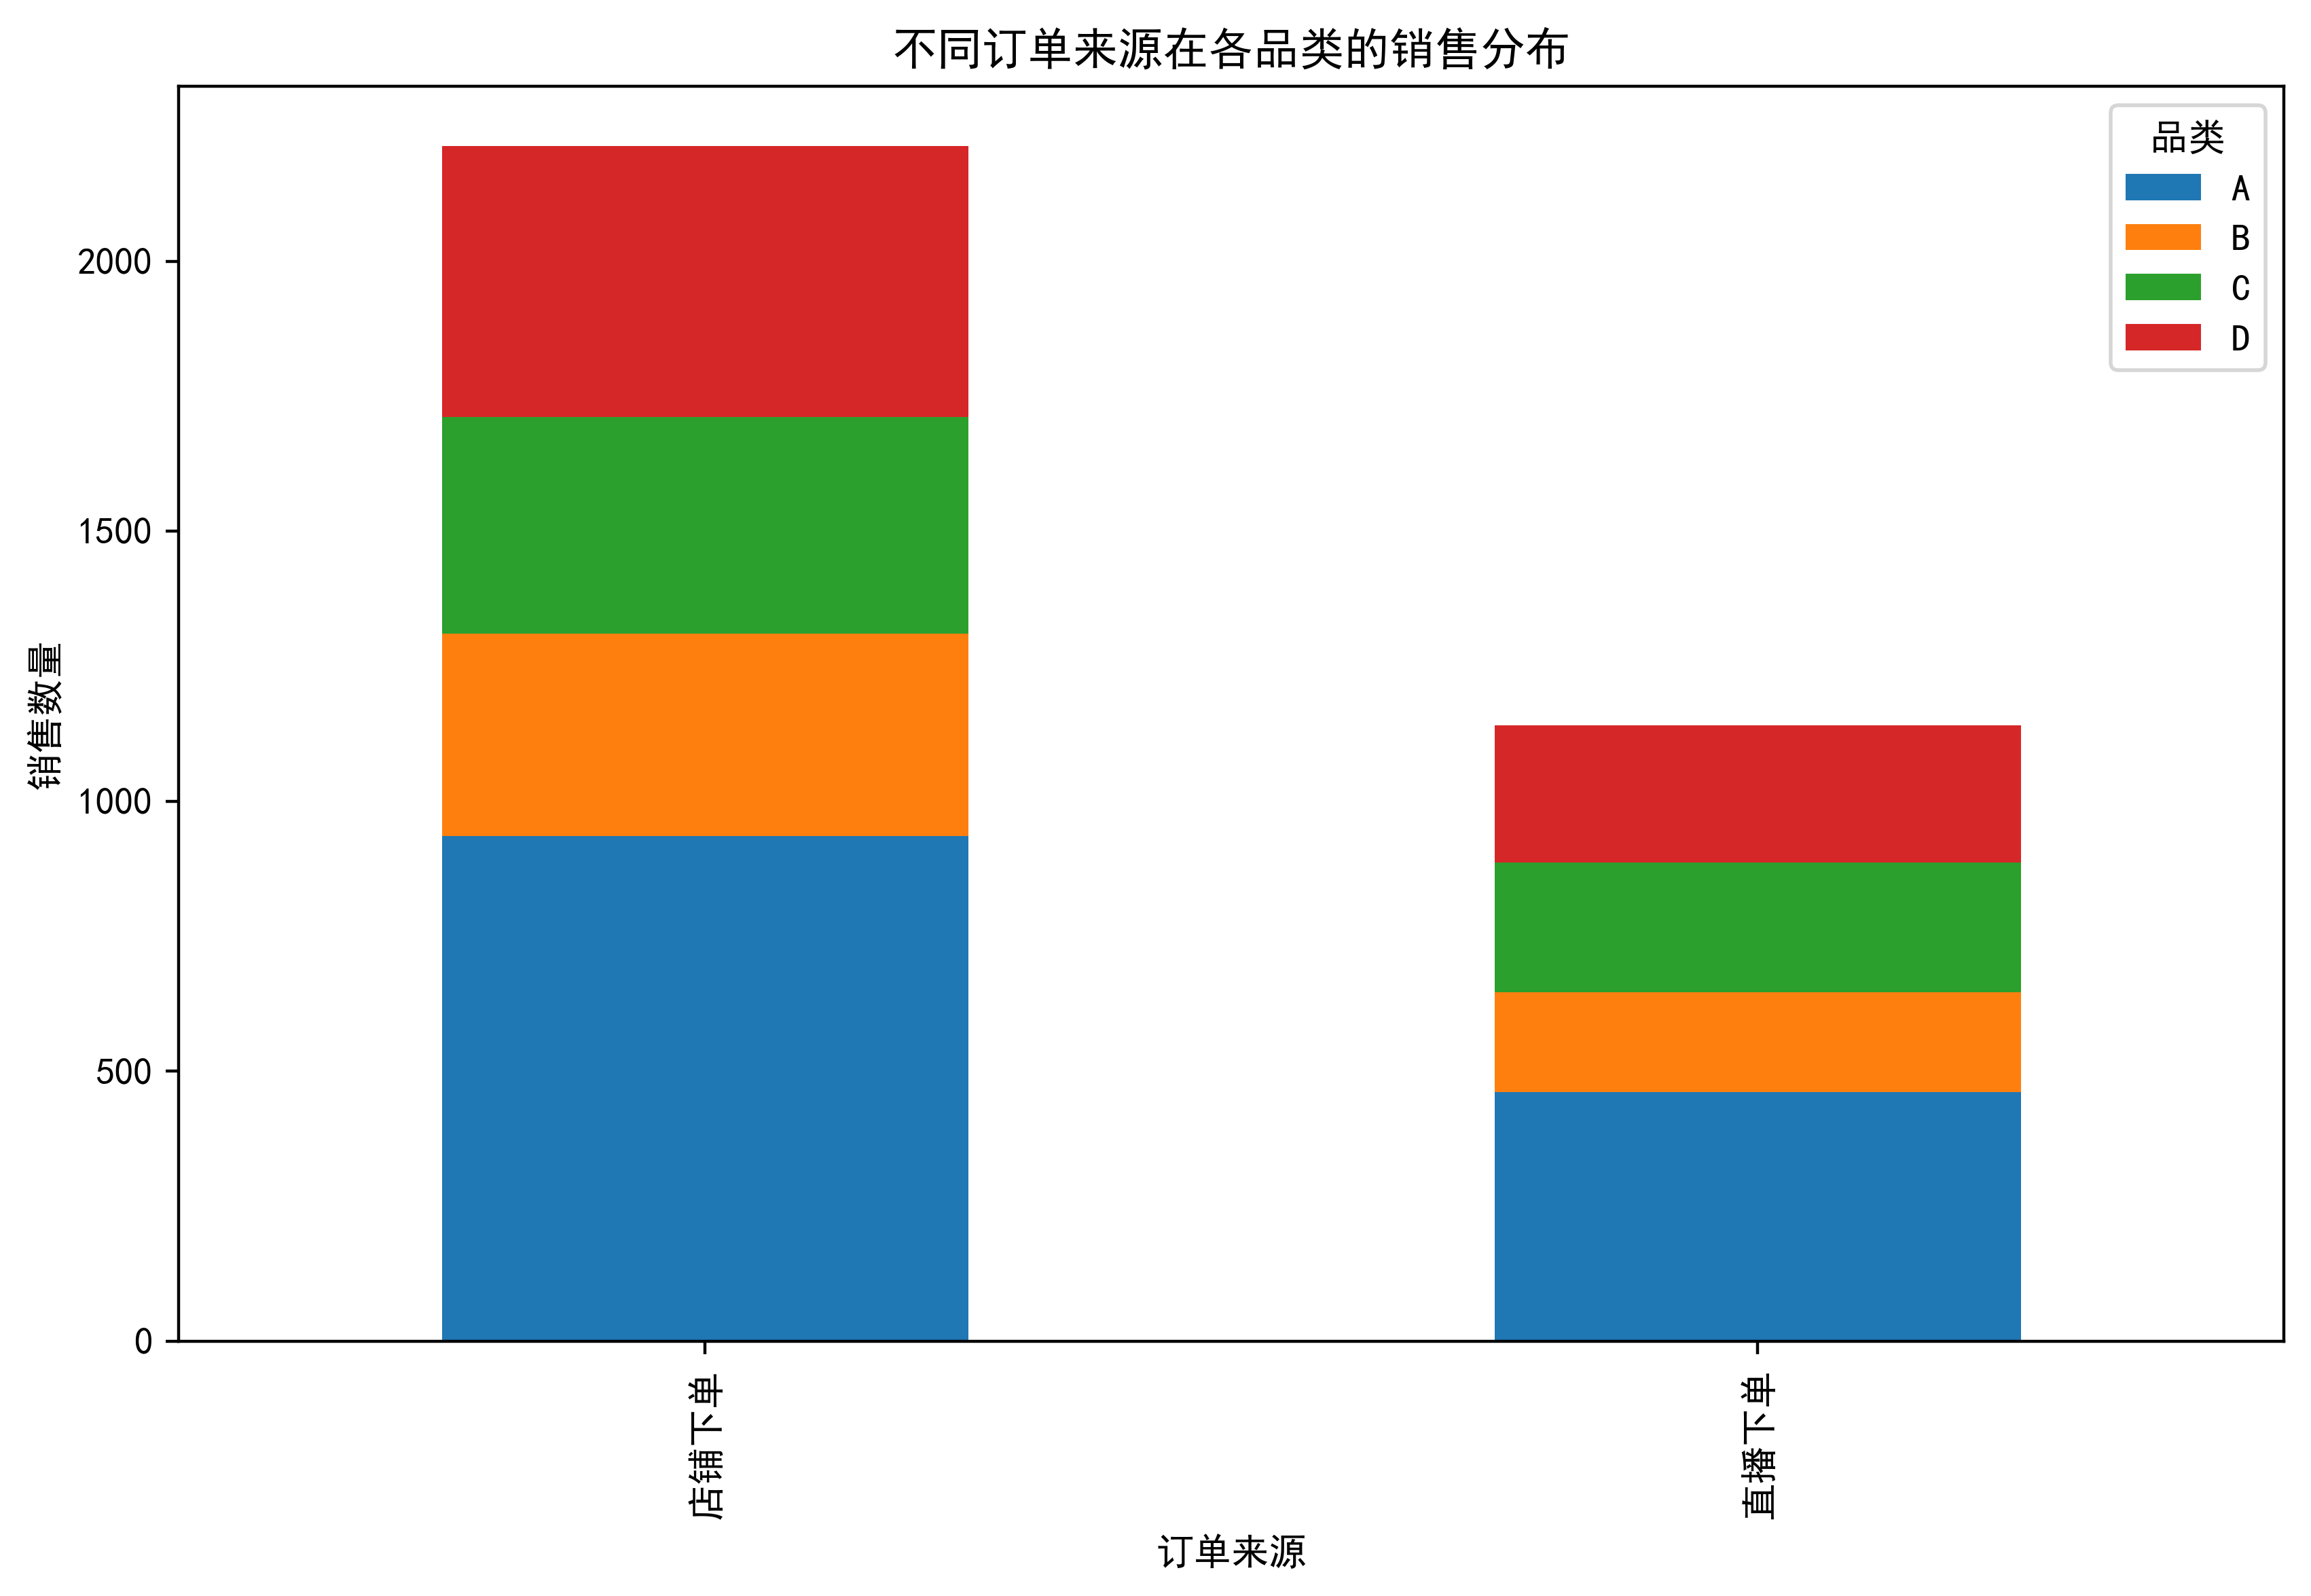

ValueError: Could not interpret input '订单来源'

<Figure size 4000x2400 with 0 Axes>

In [17]:


#平均销售额
plt.figure(figsize=(10,6))
sns.barplot(x='订单来源',y='平均销售额',data=average_sales_by_source)
plt.title('不同订单来源的平均销售额')
plt.show()

#不同订单来源在各品类的销售分布
sales_by_source_category.plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('不同订单来源在各品类的销售分布')
plt.ylabel('销售数量')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='订单来源',y='订单数量',data=order_count_by_source)
plt.title('不同订单来源的订单数量')
plt.show()

1. **平均销售额**：第一个图表显示了不同订单来源的平均销售额，从图表中可以看出，某些订单来源的平均销售额高于其他来源，这可能表明某些渠道能够吸引更多购买高价值商品的顾客
2.**购买品类分布**：第二个图表展现了不同订单来源在各品类商品的销售数量分布，通过这个图表，我们可以看到哪些订单来源在特定品类上表现更好，这有助于理解不同来源顾客的偏好
3.**订单数量（购物频率）**：第三个图表展示了不同订单来源的订单数量，这可以反映出不同来源的购物频率。订单数量多的来源可能表明该渠道的顾客更频繁地进行购买。


根据上面三个图表我们可以得出如下结论：

·**订单来源与购买行为的关系**：不同的订单来源缺失对购买金额、
购买品类和购物频率有影响，某些渠道可能更适合销售高价值商
品，而其他渠道可能在特定品类或促进更频繁购买方面表现更好

·**高订单金额的来源**：从平均销售额来看，某些特定的订单来源
带来了更高的订单金额

·**品类偏好与购物频率**：不同来源的顾客在品类偏好和购物频率上
也显示出差异

针对上述现象我们可以对商家提出如下建议：
针对性策略：根据每个订单来源的特点，制定针对性的营销和促销策略。
例如针对高平均销售额的来源，可以推出更高价值商品；而针对特定
品类表现好的来源，则可以加强相关品类的推广
提升顾客参与度：对于订单数量多的来源，可以考虑如何提升顾客的
参与度和忠诚度，如通过会员计划或定期促销活动

# 六、异常检测

在数据挖掘方面我们尝试一种分析，抛开常规的关联规则挖掘，我们试试
根据这个数据集进行异常检测，识别异常订单或行为，如异常高的退货
率、异常的购买模式等，这可以帮助识别潜在的欺诈行为或数据录入错误

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
# 关注退货率和平均购买金额

# 计算每个用户的退货率和平均购买金额
customer_abnormal_features = data.groupby('用户ID').agg(
    平均购买金额=pd.NamedAgg(column='销售额', aggfunc='mean'),
    退货次数=pd.NamedAgg(column='退货', aggfunc='sum'),
    订单次数=pd.NamedAgg(column='订单编号', aggfunc='nunique')
)

# 计算退货率
customer_abnormal_features['退货率'] = customer_abnormal_features['退货次数'] / customer_abnormal_features['订单次数']

# 选取退货率和平均购买金额进行异常检测
features_for_abnormal_detection = customer_abnormal_features[['平均购买金额', '退货率']]

# 数据标准化
scaler = StandardScaler()
scaled_abnormal_features = scaler.fit_transform(features_for_abnormal_detection)

# 使用孤立森林算法进行异常检测
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(scaled_abnormal_features)

# 将异常检测结果添加到原始特征数据中
customer_abnormal_features['异常'] = anomalies

customer_abnormal_features[customer_abnormal_features['异常'] == -1]  # 展示被标记为异常的数据

,平均购买金额,退货次数,订单次数,退货率,异常
用户ID,,,,,
BO634699,238.0,1,1,1.0,-1
BP240849,238.0,1,1,1.0,-1
BR698336,796.0,0,1,0.0,-1
DE769236,597.0,0,1,0.0,-1
EH604913,597.0,1,1,1.0,-1
EW304358,316.0,1,1,1.0,-1
GI821875,238.0,1,1,1.0,-1
GL832493,796.0,0,1,0.0,-1
HS388735,238.0,1,1,1.0,-1


其中孤立森林（Isolation Forest)是一种用于异常检测的机器学习
算法，它的原理相对简单但非常有效。
孤立森林的基本思想是通过构建一颗随机的二叉树来识别异常点。
算法的核心原理可以概括为以下几个步骤：

1.随机选择样本：从数据集中随机选择一个样本点作为根节点，然后从剩余的样本中再次随机选择一个样本作为其子节点

2.随机选择特征：在每个节点上，随机选择一个特征维度，然后随机选择一个划分值在该特征维度上，将数据分为两个子节点。这个划分值可以在该特征维度上的最小值和最大值之间随机选择

3.重复子树构建：不断地重复步骤1和步骤2，直到达到指定的树深度
或某个终止条件。这样就会形成一颗随机的二叉树，其中叶子节点代表数据的子集

4.异常分数计算：通过估计样本点在树中的深度来计算异常分数。通过异常点在树种的深度较浅，而正常点在树中的深度较深。因此异常点的深度较浅，它们的异常分数较低，而正常点的深度较深，异常分数较高

5.异常点识别：根据计算得到的异常分数，可以对样本进行排序，异常分数较低的样本被视为异常点，而异常分数较高的样本被视为正常点

孤立森林的优点包括对高维数据和大规模数据的处理能力较强，而且对于异常点的检测速度较快。它不依赖于数据分布的假设，并且在训练过程中没有复杂的参数调整，因此易于使用。然而，需要注意的是，孤立森林可能对于一些具有复杂结构的数据集效果不佳，因此在实际应用中，需要根据具体问题选择合适的异常检测方法

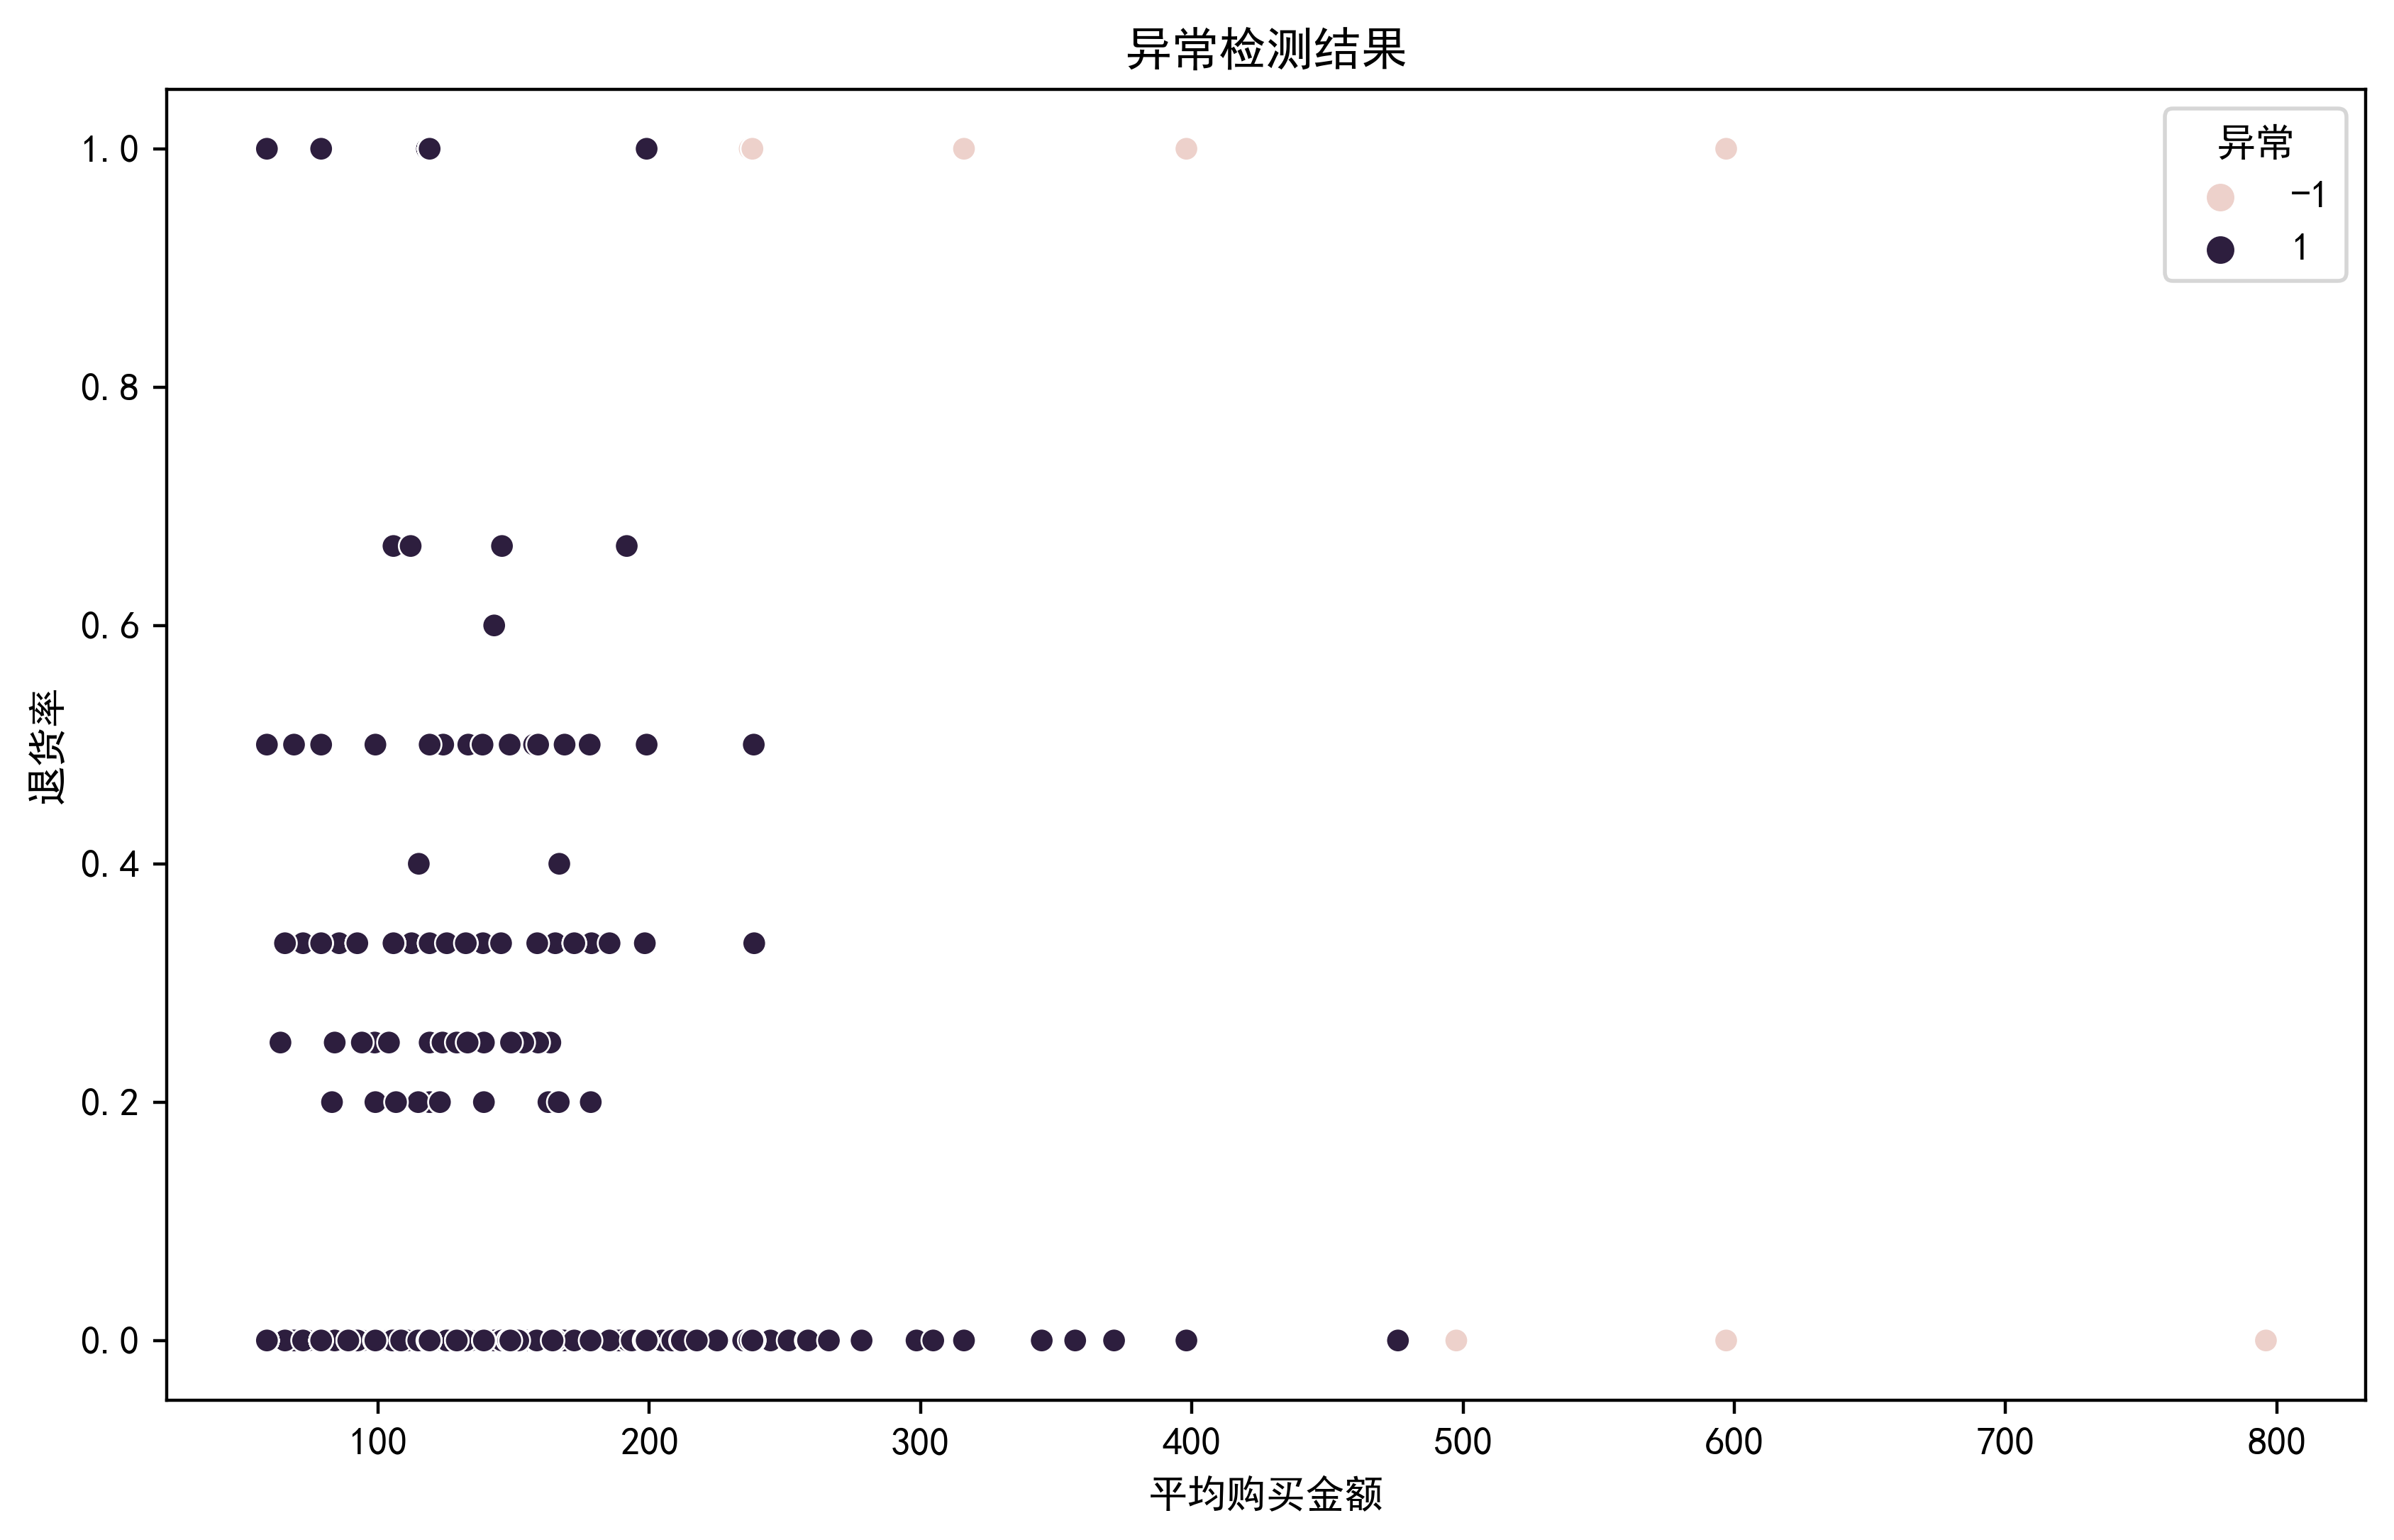

In [ ]:
#可视化异常检测结果
plt.figure(figsize=(10,6))
sns.scatterplot(x='平均购买金额',y='退货率',hue='异常',
                data=customer_abnormal_features)
plt.title('异常检测结果')
plt.show()

我们使用了孤立森林算法对顾客的购买行为进行了异常检测，关注的主要特征是平均购买金额和退货率，异常检测的结果标记了一些用户为异常行为（在数据中以-1标记），这些可能是潜在的欺诈行为或数据录入错误。

以下是对异常检测结果的简要分析：

**退货率和平均购买金额异常高**：一些用户的退货率为100%，即他们所有的订单都进行了退货，或者他们的平均购买金额异常高，这些都被标记为异常行为
**潜在的欺诈行为或数据错误**：这些异常可能是由于欺诈行为（如反复购买和退货）或数据录入错误造成的

这些异常行为的发现可以帮助商家识别潜在的风险，采取相应的预防措施，如加强对退货政策的管理或审查价值订单。对于被标记为异常的用户，商家可能需要进行更深入的调查，以确认是否存在欺诈行为或数据问题，并采取相应的措施

# 七、回归分析
接下来我们将构建销售额预测模型，我们首先选择会员、首次下单用户、活动优惠、品类、商品单价、购买数量作为相关特征，然后对分类变量进行编码，如将文本数据转换为数字，对连续变量进行标准化，接着我们选择线性回归模型，将数据划分为训练集和测试集，在训练集上训练线性回归模型，最后我们使用均方误差和R来评估我们的模型

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
features=data[['会员','首次下单用户','活动优惠','品类',
               '商品单价','购买数量']]
features=pd.get_dummies(features,drop_first=True)

target=data['销售额']
#划分数据集

X_train,X_test,y_train,y_test=train_test_split(features,
target,test_size=0.2,random_state=0)

#构建随机森林回归模型
rf_model=RandomForestRegressor(n_estimators=100,random_state=0)
rf_model.fit(X_train,y_train)

#在测试集上进行预测
y_pred=rf_model.predict(X_test)

#评估模型
mse_rf=mean_squared_error(y_test,y_pred)
r2_rf=r2_score(y_test,y_pred)


mse_rf,r2_rf

(0.005169299552906089, 0.9999991294751991)

**均方误差（MSE）**：这是预测误差的平方的平均值。在我们的案例中，MSE非常小，这表示模型的预测精度非常高。
**R2**:这是决定系数，反映了模型对变量的解释程度。其值接近1表示模型解释力非常强。在我们的案例中，R2值非常接近1，表明模型在很大程度上解释了销售额的变异。

根据R2值和MSE来看，随机森林回归模型在这个数据集上表示非常出色，能够非常准确地预测销售额。这意味着选取的特征（如会员状态、首次下单用户、活动优惠、品类、商品单价、购买数量等）在预测销售额方面是有效的。


# 八、需求预测

对于需求预测我们可以构建时间序列分析模型来预测未来特定时间段内的销售趋势和顾客需求。我们尝试构建一个时间序列分析模型来预测未来特定时间段内的销售趋势和顾客需求，我们可以考虑使用ARIMA模型（自回归整合移动平均模型），它适用于非季节性的数据，或者季节性分解的时间序列预测模型，如果数据显示出明显的季节性变化。

首先需要做的就是确保数据按时间顺序排列并且是时间序列格式，根据需要的预测粒度（如日、周、月）聚合数据，然后选择合适的时间序列模型，如ARIMA或季节性分解模型，对模型的参数进行选择和调整，接着我们在历史数据上训练模型，使用如交叉验证等方法来验证模型的准确性和鲁棒性，最后我们使用模型对未来的销售趋势和顾客需求进行预测

In [ ]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt 

#创建时间序列数据
#聚合数据以得到每天的总销售额
data['订单交易时间']=pd.to_datetime(data['订单交易时间'])
time_series_data=data.groupby('订单交易时间')['销售额'].sum()

#时间序列可视化
time_series_data.plot()
plt.title('每日销售额时间序列')
plt.xlabel('日期')
plt.ylabel('销售额')
plt.show()

#由于时间序列分析需要连续的数据，我们选取连续的一段时间进行分析
continuous_time_series=time_series_data['2023-01-01':'2023-06-30']

#使用ARIMA模型进行预测
#这里我们随意选择一组参数（p=5,d=1,q=0)来演示
#在实际应用中，这些参数需要通过网络搜索等方法来优化
model=ARIMA(continuous_time_series,order=(5,1,0))
model_fit=model.fit()

#预测未来30天的销售额
forecast=model_fit.forecast(steps=30)

forecast







ModuleNotFoundError: No module named 'statsmodels'

使用ARIMA模型，我们已经预测了未来30天的销售额，结果如下：
·模型预测了从2023-07-01至2023-0730的每日销售额
·预测值显示了在此期间销售额有轻微的波动，但大致保持在一定的范围内。
这些预测可以帮助进行库存规划、营销活动安排以及资源配置等，值得注意的是预测值仅为模型基于历史数据的估计，实际销售额可能受到多种因素影响

另外我想说的是：

**模型参数**：选用的ARIMA模型参数（p=5,d=1,q=0)是随意设定的，实际应用中应该通过网络搜素等方法进行优化

**模型诊断**：需要进行模型诊断来检查残差是否呈现随机白噪声模式，确保模型的有效性

**外部因素**：此模型未考虑可能影响销售额的外部因素，如节假日、促销活动、市场趋势等